## We have to analysis and predict failures in marine power systems which can help to identify potential issues before they become major problems.

### Necesary Liabraries

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, recall_score,f1_score,precision_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [341]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [342]:
import warnings
warnings.filterwarnings("ignore")

In [343]:
data = pd.read_excel('/content/drive/My Drive/Capstoneproject/componet_Failure.xlsx', na_values='-')

In [344]:
 data.head()

Compnent Age  Monthly run time Location  Flow Rate  OPX Volume  \
0          0.55               9.5        B    0.99740         NaN   
1          0.32              12.7        A    0.99184         NaN   
2          0.57               9.7        B    0.99743         NaN   
3          0.50               9.5        B    0.99593         NaN   
4          0.44              10.8        A    0.99280         NaN   

   Max Output Rate  Sensor 1_Temparature  Sensor 2_Vibration  \
0             32.0                  10.0                1.90   
1             28.0                   6.9               10.55   
2             86.0                   7.2                2.30   
3             84.0                   7.1                1.80   
4            127.0                   7.0                4.90   

   Sensor 3_Current  Sensor 4_Voltage  Sensor 5_Insulation Resistance  \
0             0.580              3.13                            0.22   
1             0.300              3.07                            0.30   
2             0.660              3.53                            0.03   
3             0.755              3.19                            0.15   
4             0.290              3.17                            0.37   

   Sensor 6 Power Quality  Days since maintenance  Target  
0                   0.080                     9.0       0  
1                   0.037                     4.0       0  
2                   0.078                    16.0       0  
3                   0.107                    20.0       0  
4                   0.034                    26.0       0

In [345]:
print(data.shape)

(6497, 14)


In [346]:
data.dtypes

Compnent Age                      float64
Monthly run time                  float64
Location                           object
Flow Rate                         float64
OPX Volume                        float64
Max Output Rate                   float64
Sensor 1_Temparature              float64
Sensor 2_Vibration                float64
Sensor 3_Current                  float64
Sensor 4_Voltage                  float64
Sensor 5_Insulation Resistance    float64
Sensor 6 Power Quality            float64
Days since maintenance            float64
Target                              int64
dtype: object

In [347]:
data['Location'] = data['Location'].astype('category')

In [348]:
data.dtypes

Compnent Age                       float64
Monthly run time                   float64
Location                          category
Flow Rate                          float64
OPX Volume                         float64
Max Output Rate                    float64
Sensor 1_Temparature               float64
Sensor 2_Vibration                 float64
Sensor 3_Current                   float64
Sensor 4_Voltage                   float64
Sensor 5_Insulation Resistance     float64
Sensor 6 Power Quality             float64
Days since maintenance             float64
Target                               int64
dtype: object

In [349]:
data.nunique()

Compnent Age                      111
Monthly run time                  111
Location                            2
Flow Rate                         998
OPX Volume                         12
Max Output Rate                   276
Sensor 1_Temparature              106
Sensor 2_Vibration                316
Sensor 3_Current                  187
Sensor 4_Voltage                  108
Sensor 5_Insulation Resistance     89
Sensor 6 Power Quality            214
Days since maintenance            135
Target                              2
dtype: int64

In [350]:
data.isnull().sum()

Compnent Age                         4
Monthly run time                     0
Location                             0
Flow Rate                            0
OPX Volume                        5692
Max Output Rate                      0
Sensor 1_Temparature                10
Sensor 2_Vibration                   2
Sensor 3_Current                     8
Sensor 4_Voltage                     9
Sensor 5_Insulation Resistance       3
Sensor 6 Power Quality               2
Days since maintenance               0
Target                               0
dtype: int64

In [351]:
data.isnull().mean()

Compnent Age                      0.000616
Monthly run time                  0.000000
Location                          0.000000
Flow Rate                         0.000000
OPX Volume                        0.876097
Max Output Rate                   0.000000
Sensor 1_Temparature              0.001539
Sensor 2_Vibration                0.000308
Sensor 3_Current                  0.001231
Sensor 4_Voltage                  0.001385
Sensor 5_Insulation Resistance    0.000462
Sensor 6 Power Quality            0.000308
Days since maintenance            0.000000
Target                            0.000000
dtype: float64

<Axes: >

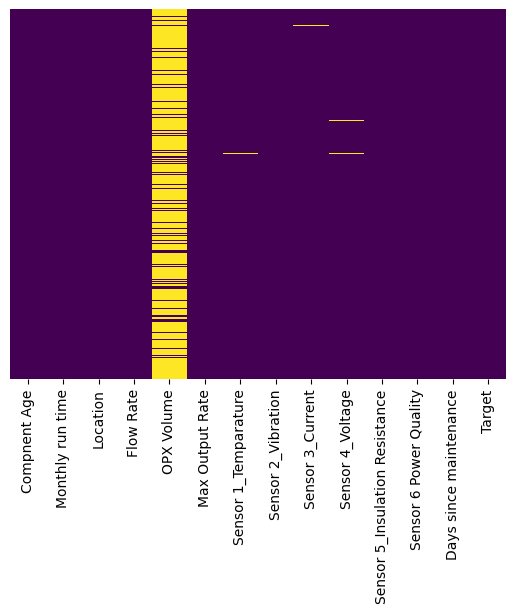

In [352]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## From above heat map it is clear that more than 85% of rows in Column OPX Volume is null, therefore its good to drop this column.

In [353]:
data.drop(['OPX Volume'], axis=1, inplace=True)

In [354]:
data.describe()

Compnent Age  Monthly run time    Flow Rate  Max Output Rate  \
count   6493.000000       6497.000000  6497.000000      6497.000000   
mean       0.531215         10.491801     0.994697       115.744574   
std        0.148814          1.192712     0.002999        56.521855   
min        0.220000          8.000000     0.987110         6.000000   
25%        0.430000          9.500000     0.992340        77.000000   
50%        0.510000         10.300000     0.994890       118.000000   
75%        0.600000         11.300000     0.996990       156.000000   
max        2.000000         14.900000     1.038980       440.000000   

       Sensor 1_Temparature  Sensor 2_Vibration  Sensor 3_Current  \
count           6487.000000         6495.000000       6489.000000   
mean               7.216579            5.444326          0.339691   
std                1.296750            4.758125          0.164649   
min                3.800000            0.600000          0.080000   
25%                6.400000            1.800000          0.230000   
50%                7.000000            3.000000          0.290000   
75%                7.700000            8.100000          0.400000   
max               15.900000           65.800000          1.580000   

       Sensor 4_Voltage  Sensor 5_Insulation Resistance  \
count       6488.000000                     6494.000000   
mean           3.218395                        0.318722   
std            0.160748                        0.145265   
min            2.720000                        0.000000   
25%            3.110000                        0.250000   
50%            3.210000                        0.310000   
75%            3.320000                        0.390000   
max            4.010000                        1.660000   

       Sensor 6 Power Quality  Days since maintenance       Target  
count             6495.000000             6497.000000  6497.000000  
mean                 0.056042               30.525319     0.196552  
std                  0.035036               17.749400     0.397421  
min                  0.009000                1.000000     0.000000  
25%                  0.038000               17.000000     0.000000  
50%                  0.047000               29.000000     0.000000  
75%                  0.065000               41.000000     0.000000  
max                  0.611000              289.000000     1.000000

Text(0.5, 1.0, 'HEATMAP')

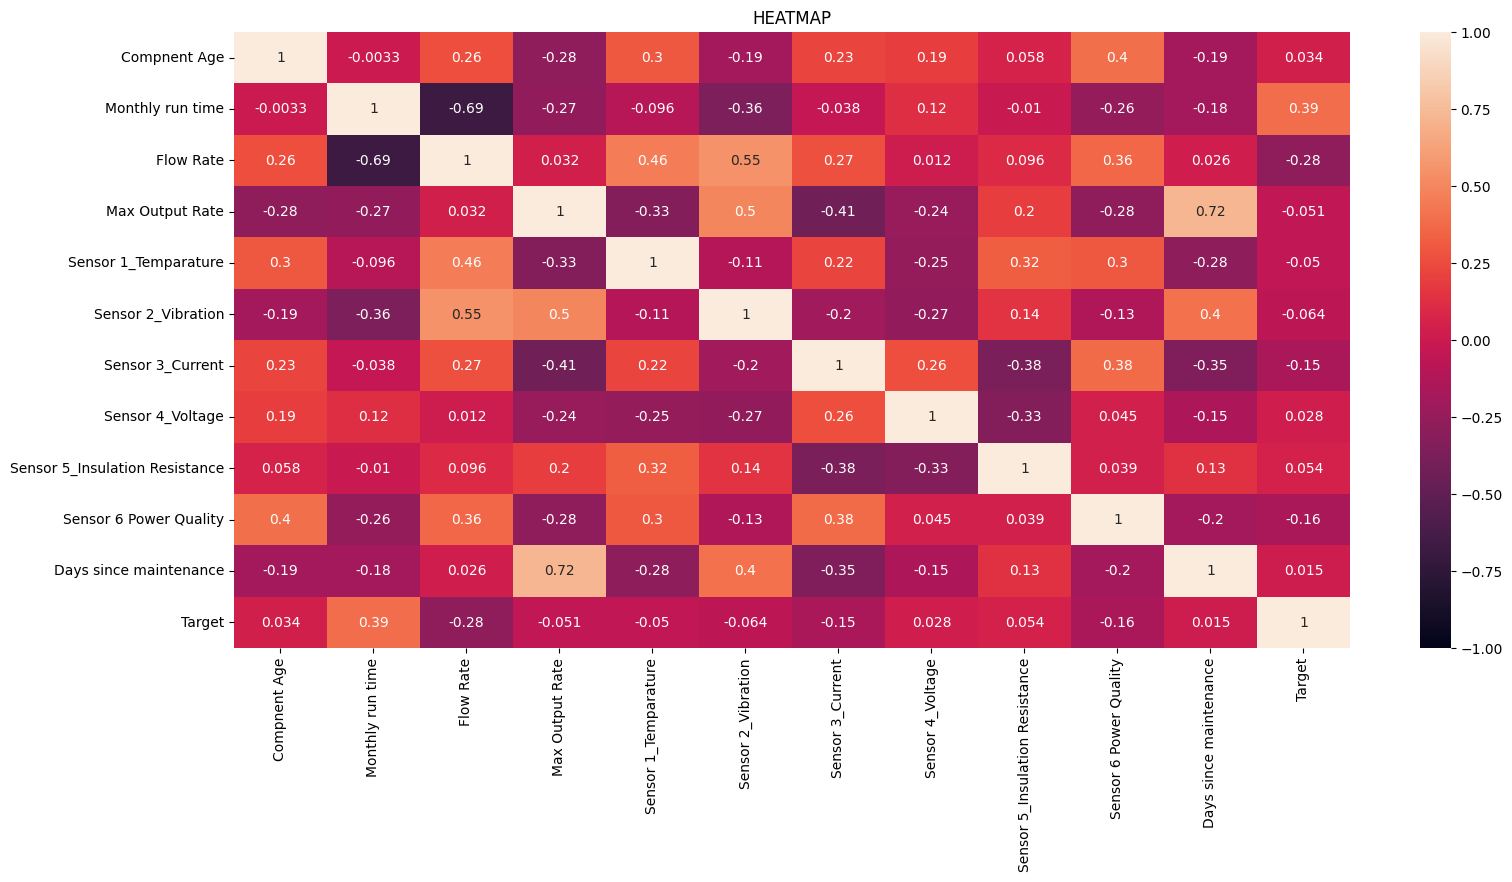

In [355]:
#fig = plt.figure(figsize=(18, 14))
#corr = data.corr()
#c = plt.pcolor(corr)
#plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
#plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
#fig.colorbar(c)

plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.title('HEATMAP')

In [356]:
sns.pairplot(data)

Output hidden; open in https://colab.research.google.com to view.

In [357]:
data.corr()

Compnent Age  Monthly run time  Flow Rate  \
Compnent Age                        1.000000         -0.003261   0.259454   
Monthly run time                   -0.003261          1.000000  -0.686745   
Flow Rate                           0.259454         -0.686745   1.000000   
Max Output Rate                    -0.275381         -0.265740   0.032395   
Sensor 1_Temparature                0.300380         -0.095603   0.459204   
Sensor 2_Vibration                 -0.185745         -0.359706   0.552498   
Sensor 3_Current                    0.225476         -0.038248   0.271193   
Sensor 4_Voltage                    0.191248          0.121002   0.011920   
Sensor 5_Insulation Resistance      0.057613         -0.010433   0.096320   
Sensor 6 Power Quality              0.395332         -0.256861   0.362594   
Days since maintenance             -0.188489         -0.179838   0.025717   
Target                              0.034159          0.390486  -0.275441   

                                Max Output Rate  Sensor 1_Temparature  \
Compnent Age                          -0.275381              0.300380   
Monthly run time                      -0.265740             -0.095603   
Flow Rate                              0.032395              0.459204   
Max Output Rate                        1.000000             -0.329747   
Sensor 1_Temparature                  -0.329747              1.000000   
Sensor 2_Vibration                     0.495820             -0.112319   
Sensor 3_Current                      -0.414928              0.220172   
Sensor 4_Voltage                      -0.237687             -0.251814   
Sensor 5_Insulation Resistance         0.195218              0.323736   
Sensor 6 Power Quality                -0.279580              0.298421   
Days since maintenance                 0.720934             -0.283317   
Target                                -0.051226             -0.049679   

                                Sensor 2_Vibration  Sensor 3_Current  \
Compnent Age                             -0.185745          0.225476   
Monthly run time                         -0.359706         -0.038248   
Flow Rate                                 0.552498          0.271193   
Max Output Rate                           0.495820         -0.414928   
Sensor 1_Temparature                     -0.112319          0.220172   
Sensor 2_Vibration                        1.000000         -0.196702   
Sensor 3_Current                         -0.196702          1.000000   
Sensor 4_Voltage                         -0.267050          0.260660   
Sensor 5_Insulation Resistance            0.142486         -0.378061   
Sensor 6 Power Quality                   -0.128902          0.377167   
Days since maintenance                    0.403439         -0.353230   
Target                                   -0.063876         -0.151502   

                                Sensor 4_Voltage  \
Compnent Age                            0.191248   
Monthly run time                        0.121002   
Flow Rate                               0.011920   
Max Output Rate                        -0.237687   
Sensor 1_Temparature                   -0.251814   
Sensor 2_Vibration                     -0.267050   
Sensor 3_Current                        0.260660   
Sensor 4_Voltage                        1.000000   
Sensor 5_Insulation Resistance         -0.328689   
Sensor 6 Power Quality                  0.044806   
Days since maintenance                 -0.145191   
Target                                  0.027741   

                                Sensor 5_Insulation Resistance  \
Compnent Age                                          0.057613   
Monthly run time                                     -0.010433   
Flow Rate                                             0.096320   
Max Output Rate                                       0.195218   
Sensor 1_Temparature                                  0.323736   
Sensor 2_Vibration                                    0.142486   
Sens

<Axes: xlabel='Days since maintenance', ylabel='Density'>

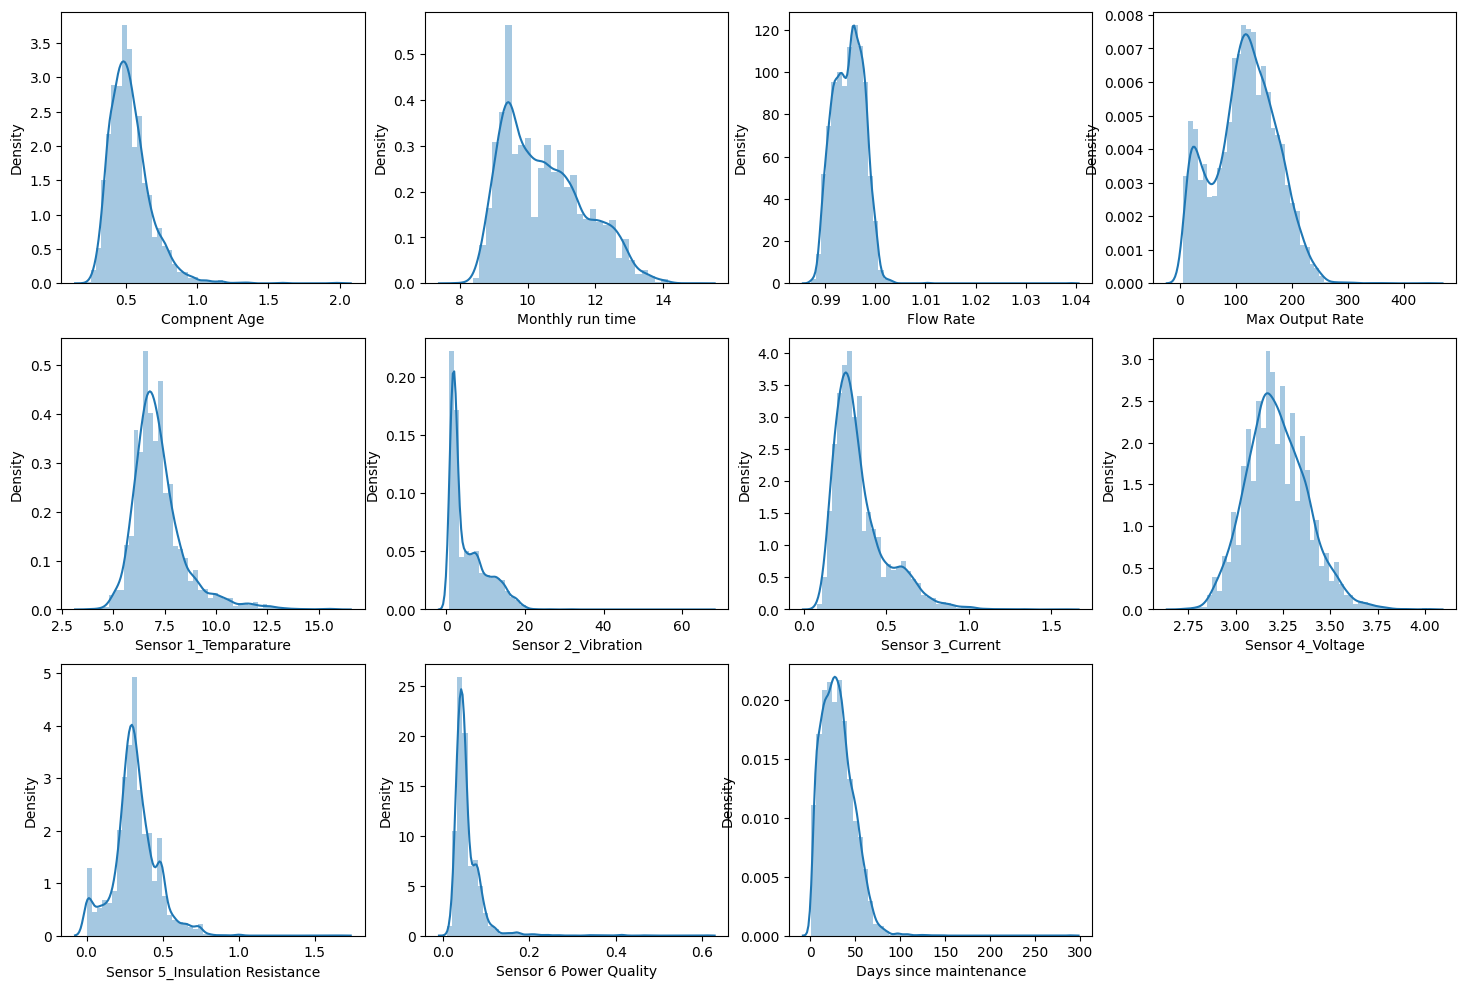

In [358]:
plt.figure(figsize=(18,12))
plt.subplot(3,4,1)
sns.distplot(data['Compnent Age'])

plt.subplot(3,4,2)
sns.distplot(data['Monthly run time'])

plt.subplot(3,4,3)
sns.distplot(data['Flow Rate'])

plt.subplot(3,4,4)
sns.distplot(data['Max Output Rate'])

plt.subplot(3,4,5)
sns.distplot(data['Sensor 1_Temparature'])

plt.subplot(3,4,6)
sns.distplot(data['Sensor 2_Vibration'])

plt.subplot(3,4,7)
sns.distplot(data['Sensor 3_Current'])

plt.subplot(3,4,8)
sns.distplot(data['Sensor 4_Voltage'])

plt.subplot(3,4,9)
sns.distplot(data['Sensor 5_Insulation Resistance'])

plt.subplot(3,4,10)
sns.distplot(data['Sensor 6 Power Quality'])

plt.subplot(3,4,11)
sns.distplot(data['Days since maintenance'])


In [359]:
print("Locations \n", + data.Location.value_counts())
print("Locations Percentage\n",+ data.Location.value_counts(normalize=True)*100)

Locations 
 A    4898
B    1599
Name: Location, dtype: int64
Locations Percentage
 A    75.388641
B    24.611359
Name: Location, dtype: float64


Text(0.5, 0, 'Day Sin. Main.')

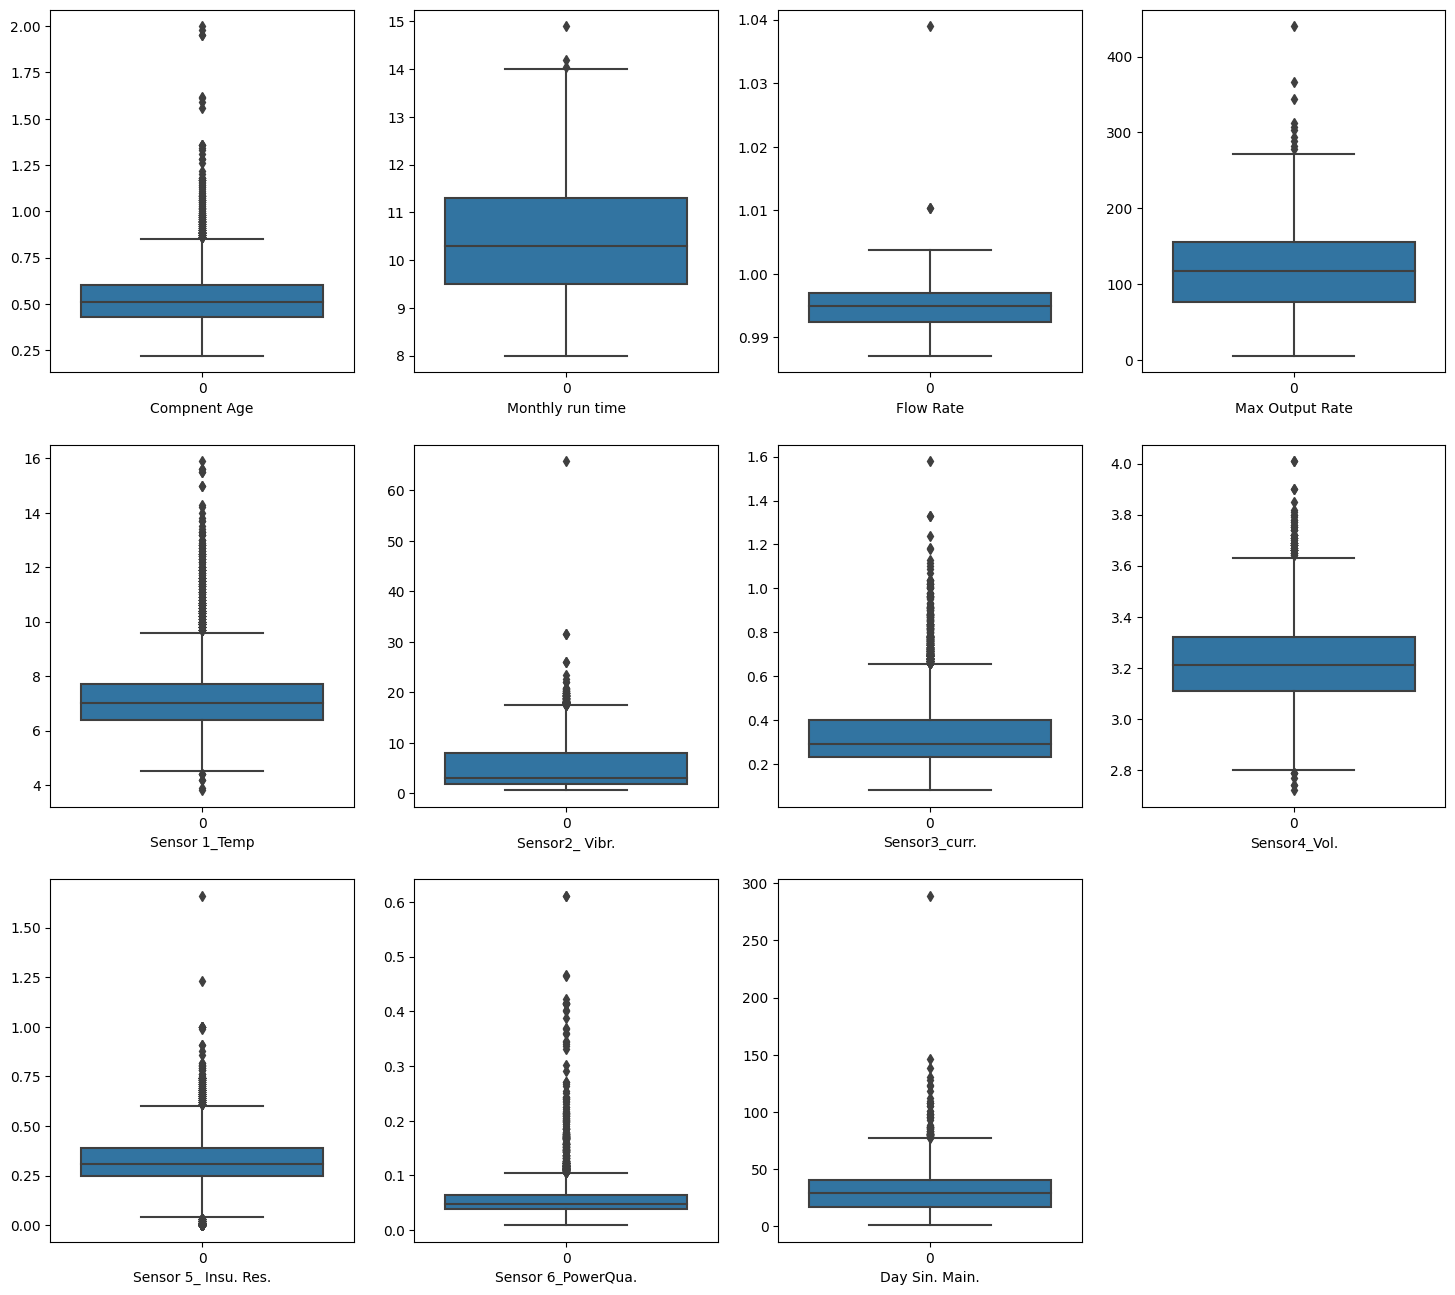

In [360]:
plt.figure(figsize=(18,16))
plt.subplot(3,4,1)
sns.boxplot(data['Compnent Age']).set_xlabel('Compnent Age')

plt.subplot(3,4,2)
sns.boxplot(data['Monthly run time']).set_xlabel('Monthly run time')

plt.subplot(3,4,3)
sns.boxplot(data['Flow Rate']).set_xlabel('Flow Rate')

plt.subplot(3,4,4)
sns.boxplot(data['Max Output Rate']).set_xlabel('Max Output Rate')

plt.subplot(3,4,5)
sns.boxplot(data['Sensor 1_Temparature']).set_xlabel('Sensor 1_Temp')

plt.subplot(3,4,6)
sns.boxplot(data['Sensor 2_Vibration']).set_xlabel('Sensor2_ Vibr.')

plt.subplot(3,4,7)
sns.boxplot(data['Sensor 3_Current']).set_xlabel('Sensor3_curr.')

plt.subplot(3,4,8)
sns.boxplot(data['Sensor 4_Voltage']).set_xlabel('Sensor4_Vol.')

plt.subplot(3,4,9)
sns.boxplot(data['Sensor 5_Insulation Resistance']).set_xlabel('Sensor 5_ Insu. Res.')

plt.subplot(3,4,10)
sns.boxplot(data['Sensor 6 Power Quality']).set_xlabel('Sensor 6_PowerQua.')

plt.subplot(3,4,11)
sns.boxplot(data['Days since maintenance']).set_xlabel('Day Sin. Main.')


Since we have less number of datas

<Axes: xlabel='Target', ylabel='count'>

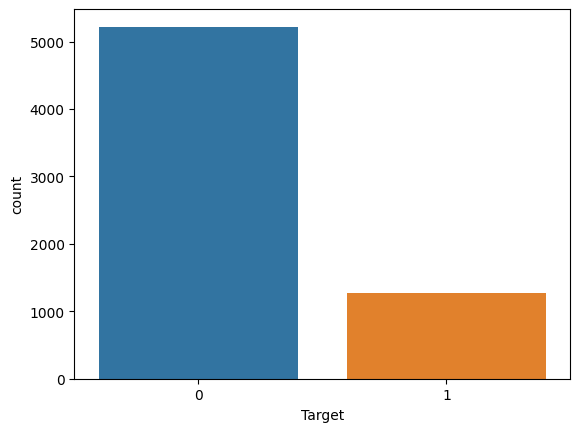

In [361]:
sns.countplot(x='Target',data=data)

<Axes: xlabel='Location', ylabel='count'>

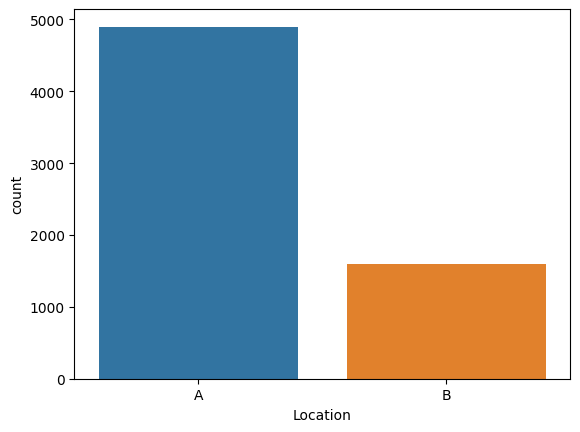

In [362]:
sns.countplot(x='Location',data=data)

<Axes: xlabel='Target', ylabel='count'>

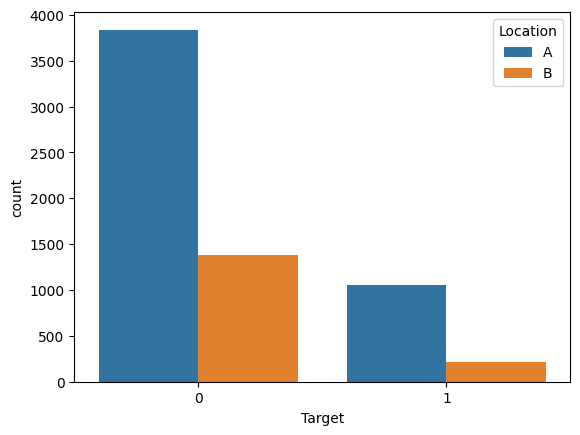

In [363]:
sns.countplot(x='Target',hue='Location',data=data)

In [364]:
component_med_age=data['Compnent Age'].median()
Sens1=data['Sensor 1_Temparature'].median()
Sens2=data['Sensor 2_Vibration'].median()
Sens3=data['Sensor 3_Current'].median()
Sens4=data['Sensor 4_Voltage'].median()
Sens5=data['Sensor 5_Insulation Resistance'].median()
Sens6=data['Sensor 6 Power Quality'].median()

In [365]:
data['Compnent Age']=data['Compnent Age'].fillna(component_med_age)
data['Sensor 1_Temparature']=data['Sensor 1_Temparature'].fillna(Sens1)
data['Sensor 2_Vibration']=data['Sensor 2_Vibration'].fillna(Sens2)
data['Sensor 3_Current']=data['Sensor 3_Current'].fillna(Sens3)
data['Sensor 4_Voltage']=data['Sensor 4_Voltage'].fillna(Sens4)
data['Sensor 5_Insulation Resistance']=data['Sensor 5_Insulation Resistance'].fillna(Sens5)
data['Sensor 6 Power Quality']=data['Sensor 6 Power Quality'].fillna(Sens6)

In [366]:
data.isnull().sum()

Compnent Age                      0
Monthly run time                  0
Location                          0
Flow Rate                         0
Max Output Rate                   0
Sensor 1_Temparature              0
Sensor 2_Vibration                0
Sensor 3_Current                  0
Sensor 4_Voltage                  0
Sensor 5_Insulation Resistance    0
Sensor 6 Power Quality            0
Days since maintenance            0
Target                            0
dtype: int64

<Axes: xlabel='Flow Rate', ylabel='Max Output Rate'>

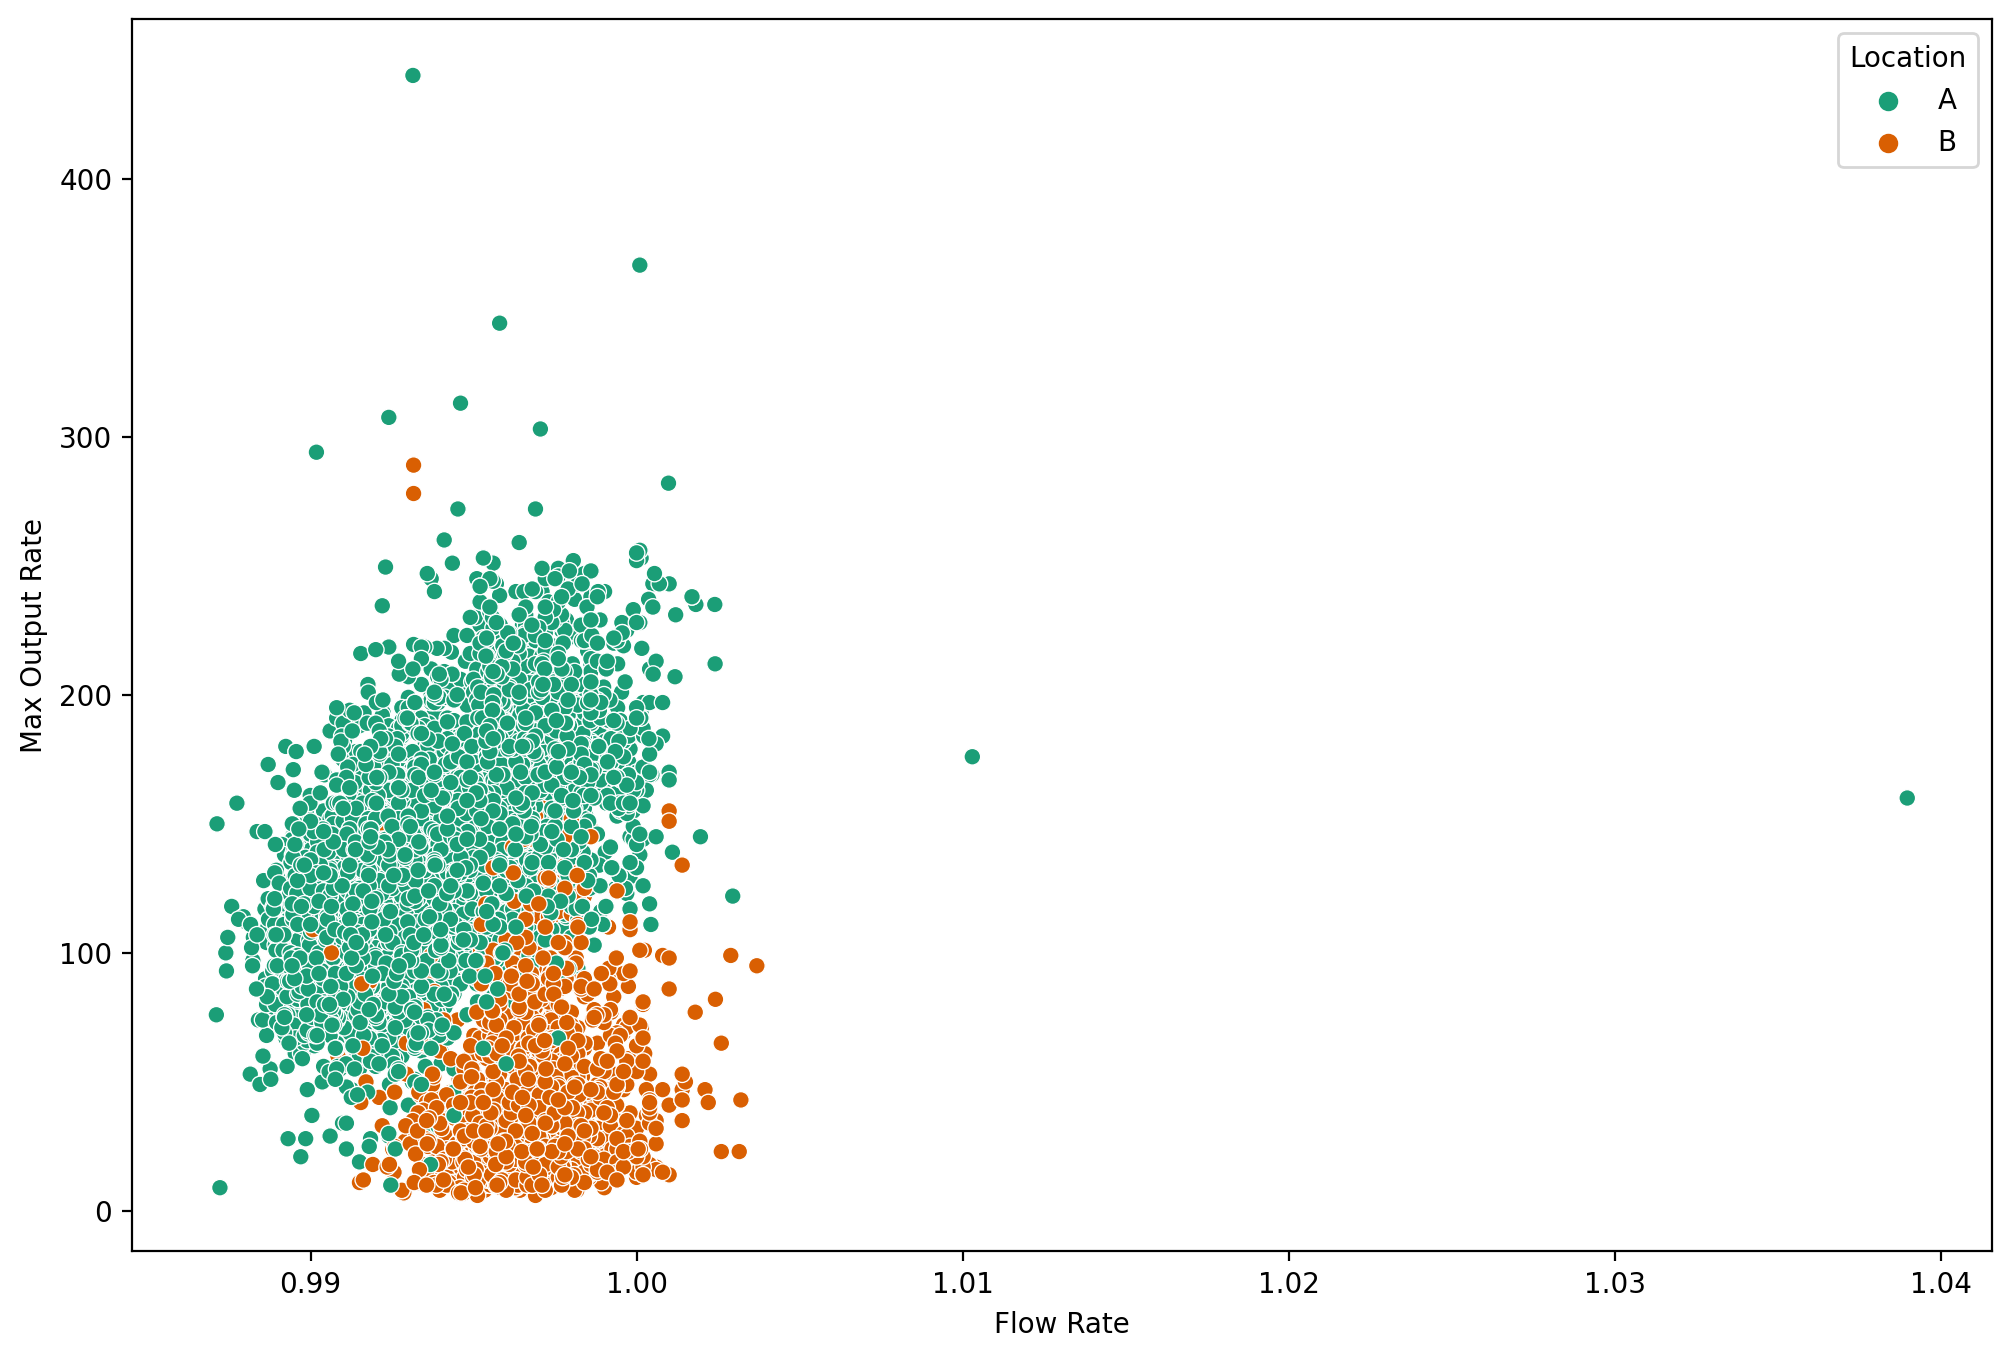

In [367]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x='Flow Rate', y='Max Output Rate', data=data, hue='Location', palette='Dark2')

<Axes: xlabel='Flow Rate', ylabel='Sensor 1_Temparature'>

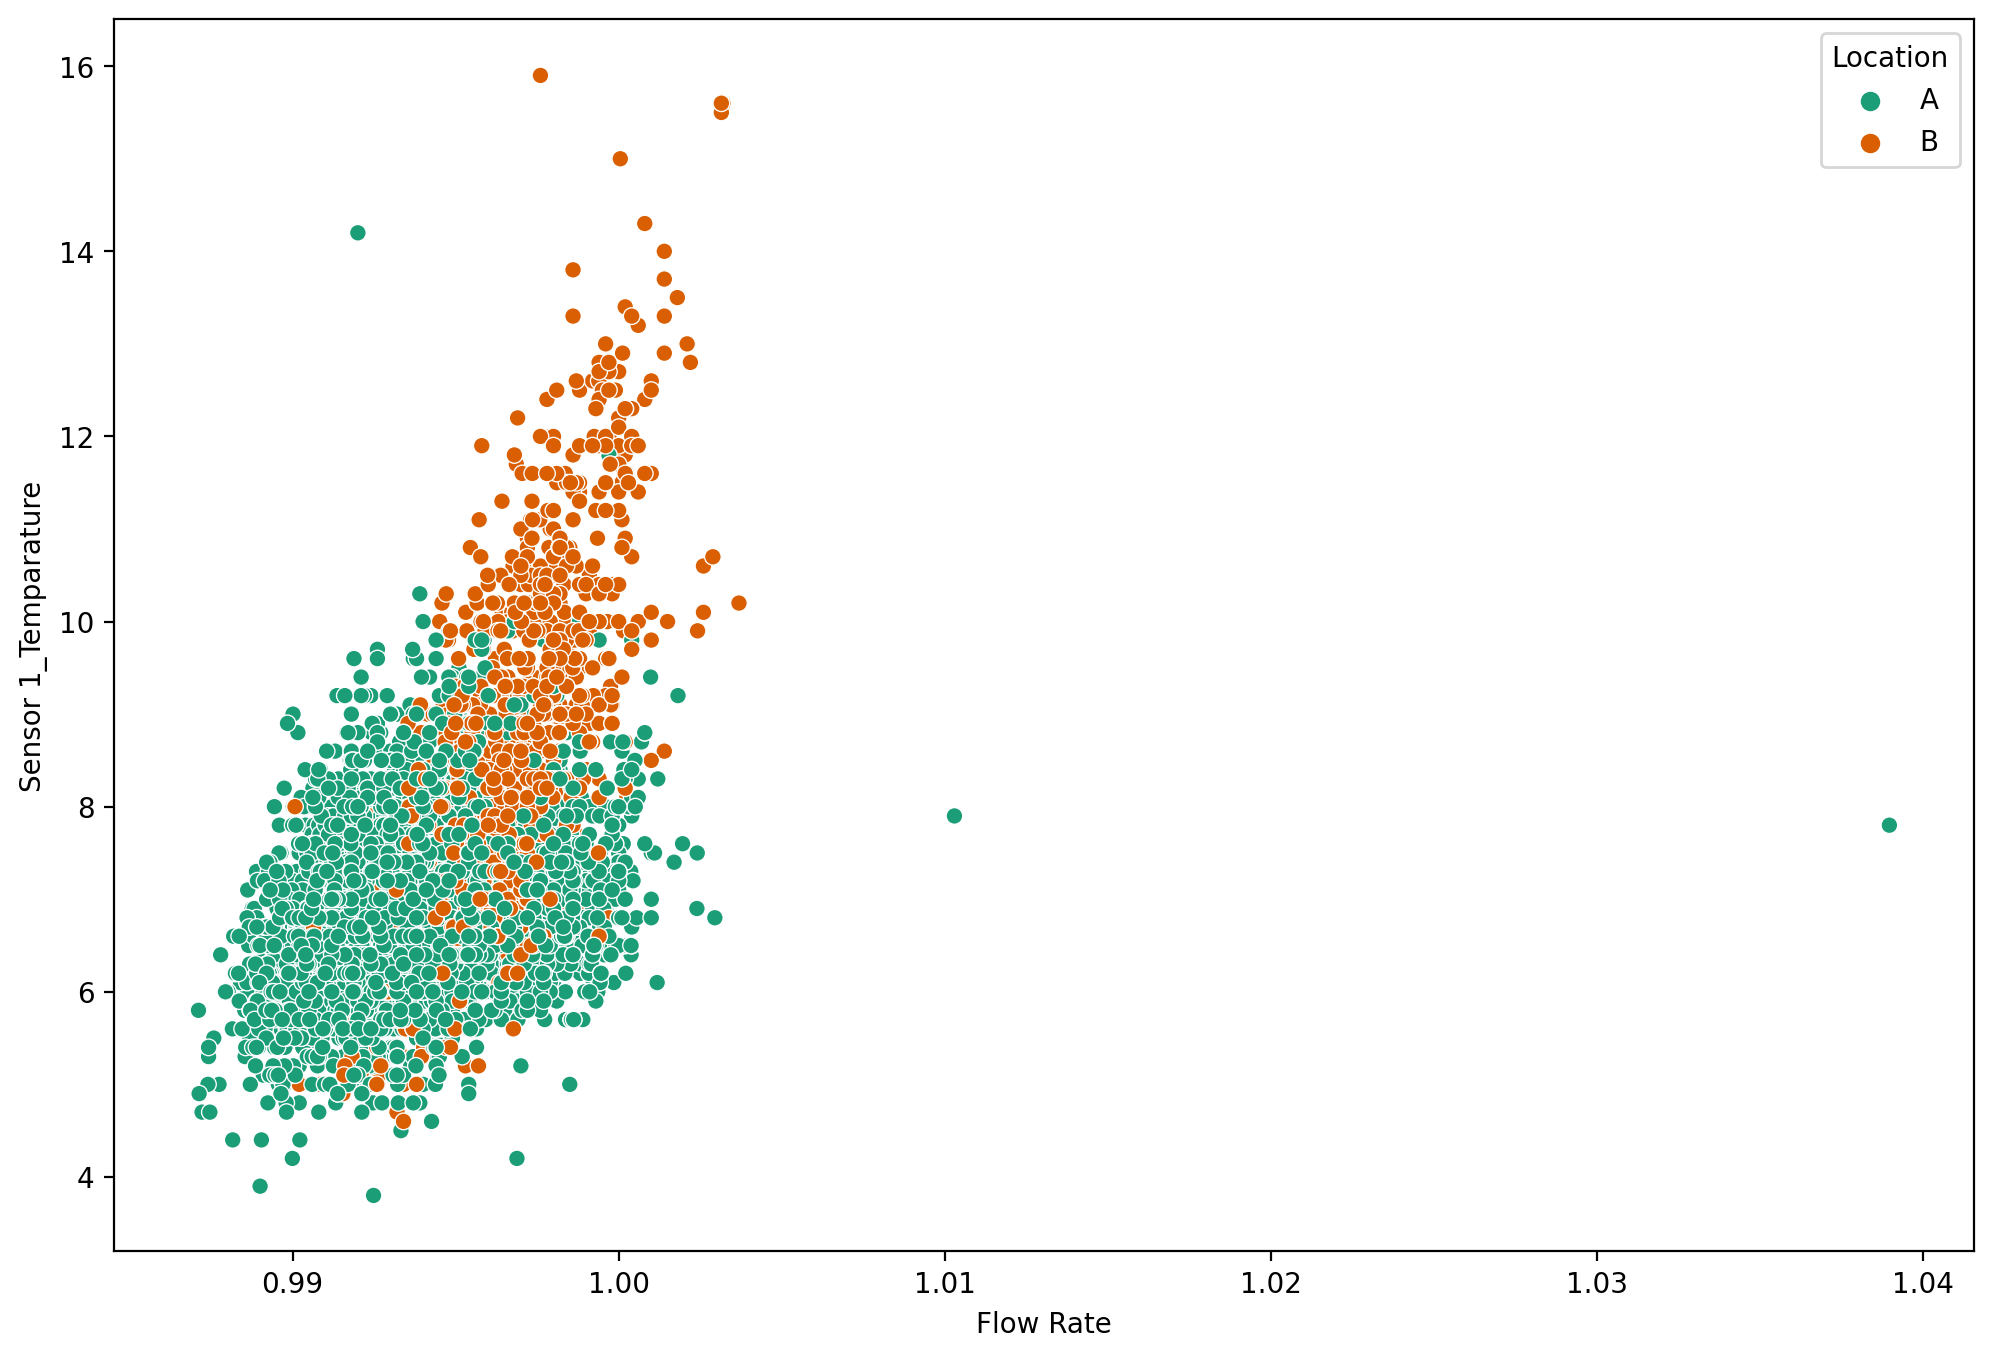

In [368]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x='Flow Rate', y='Sensor 1_Temparature', data=data, hue='Location', palette='Dark2')

<Axes: xlabel='Flow Rate', ylabel='Sensor 2_Vibration'>

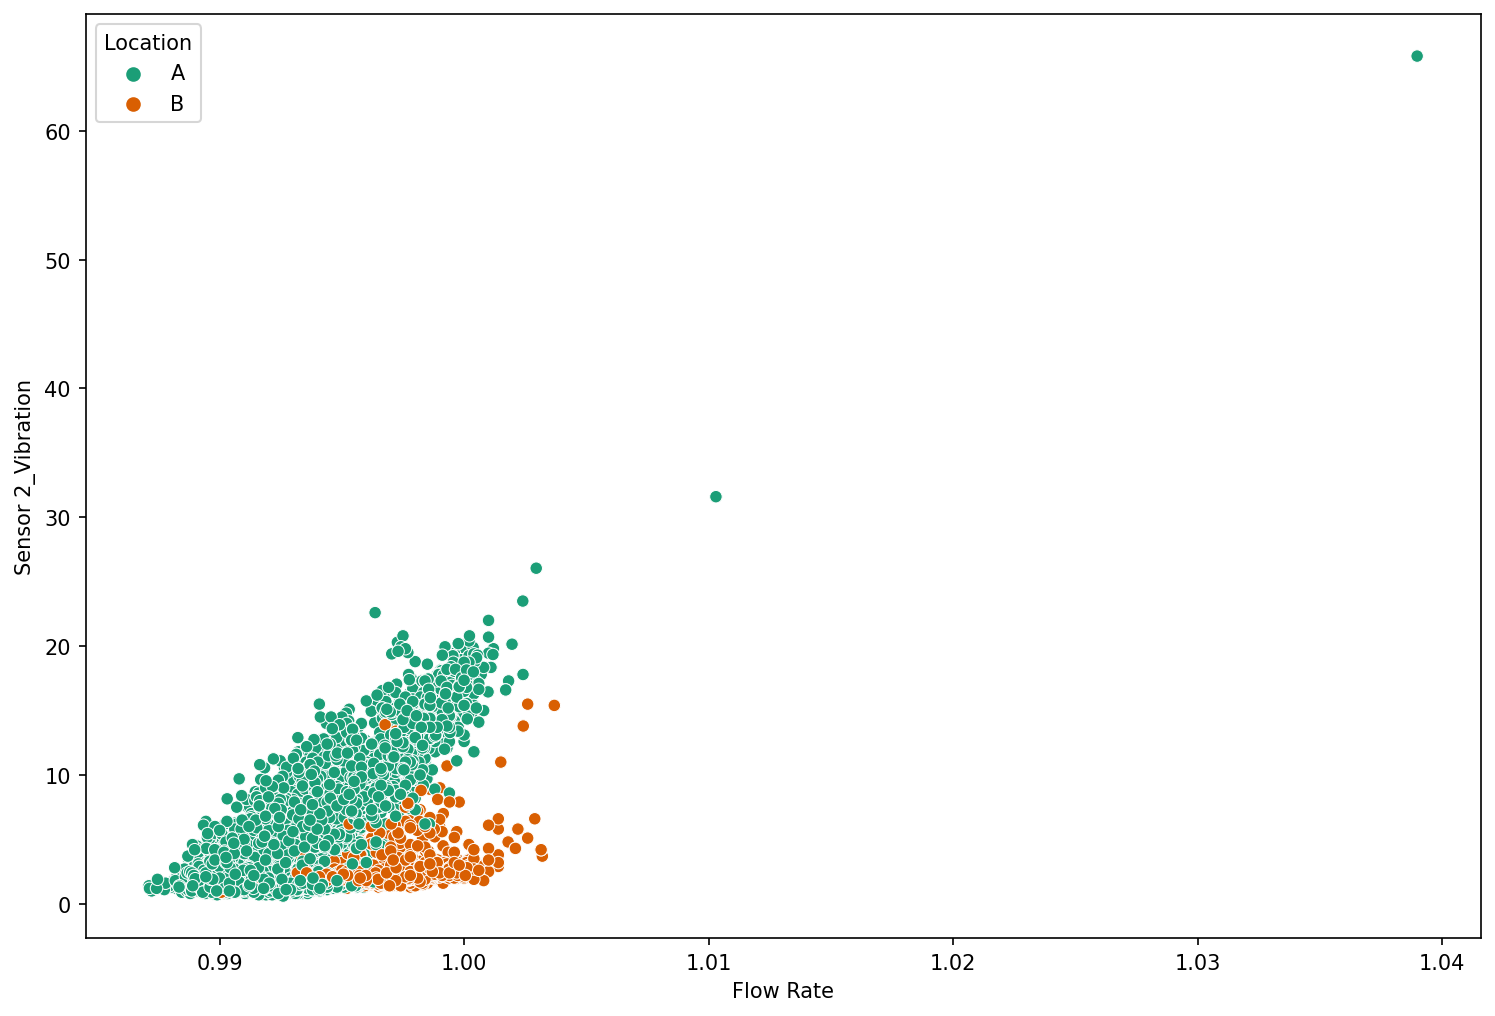

In [369]:
plt.figure(figsize=(12,8), dpi=150)
sns.scatterplot(x='Flow Rate', y='Sensor 2_Vibration', data=data, hue='Location', palette='Dark2')

<Axes: xlabel='Flow Rate', ylabel='Sensor 3_Current'>

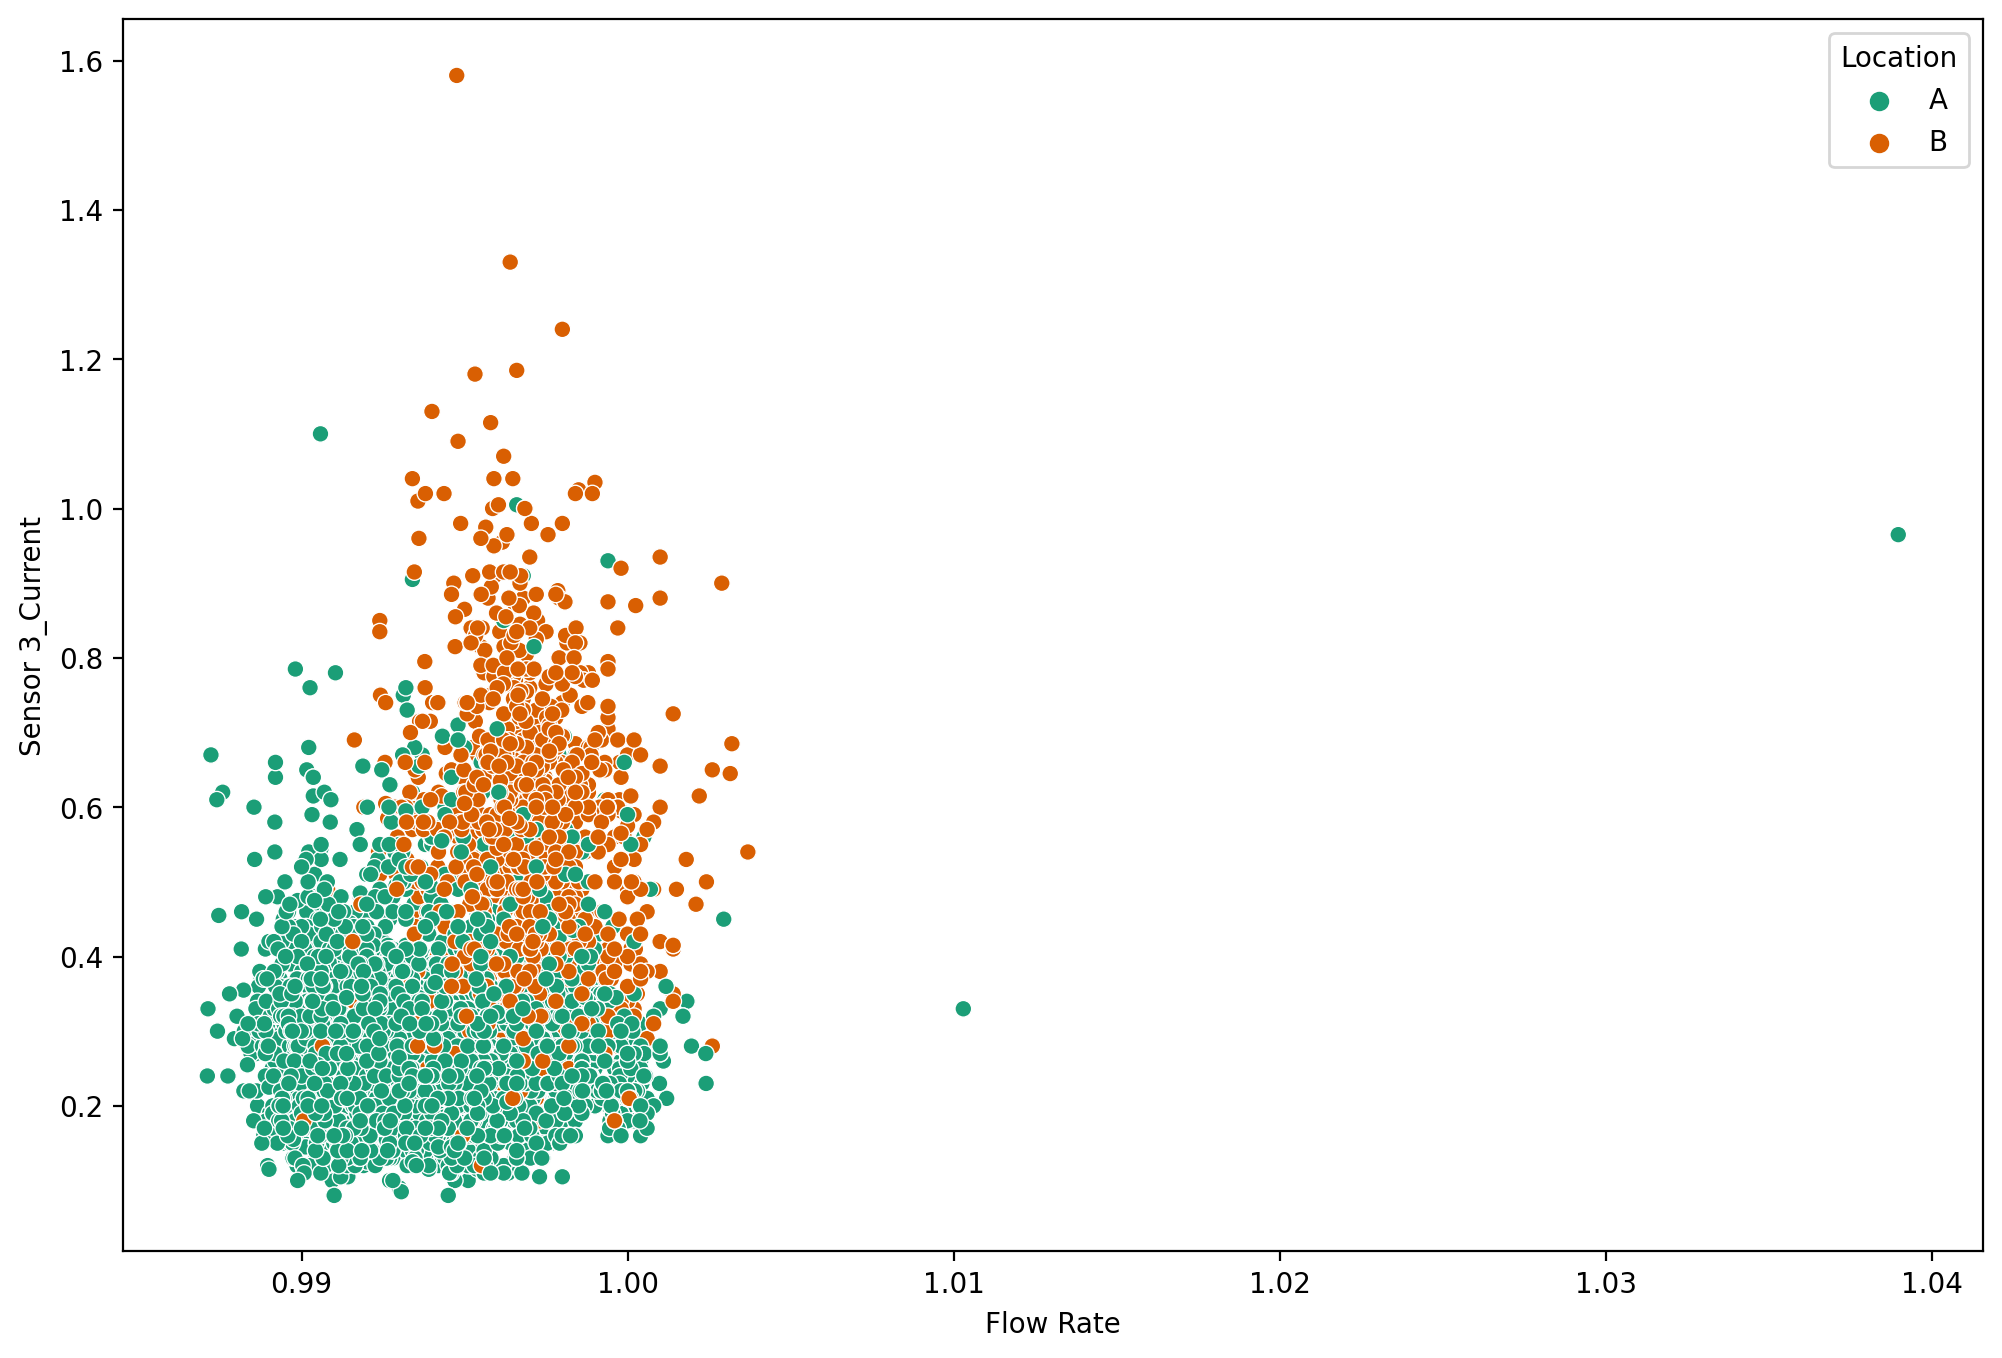

In [370]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x='Flow Rate', y='Sensor 3_Current', data=data, hue='Location', palette='Dark2')

<Axes: xlabel='Flow Rate', ylabel='Sensor 5_Insulation Resistance'>

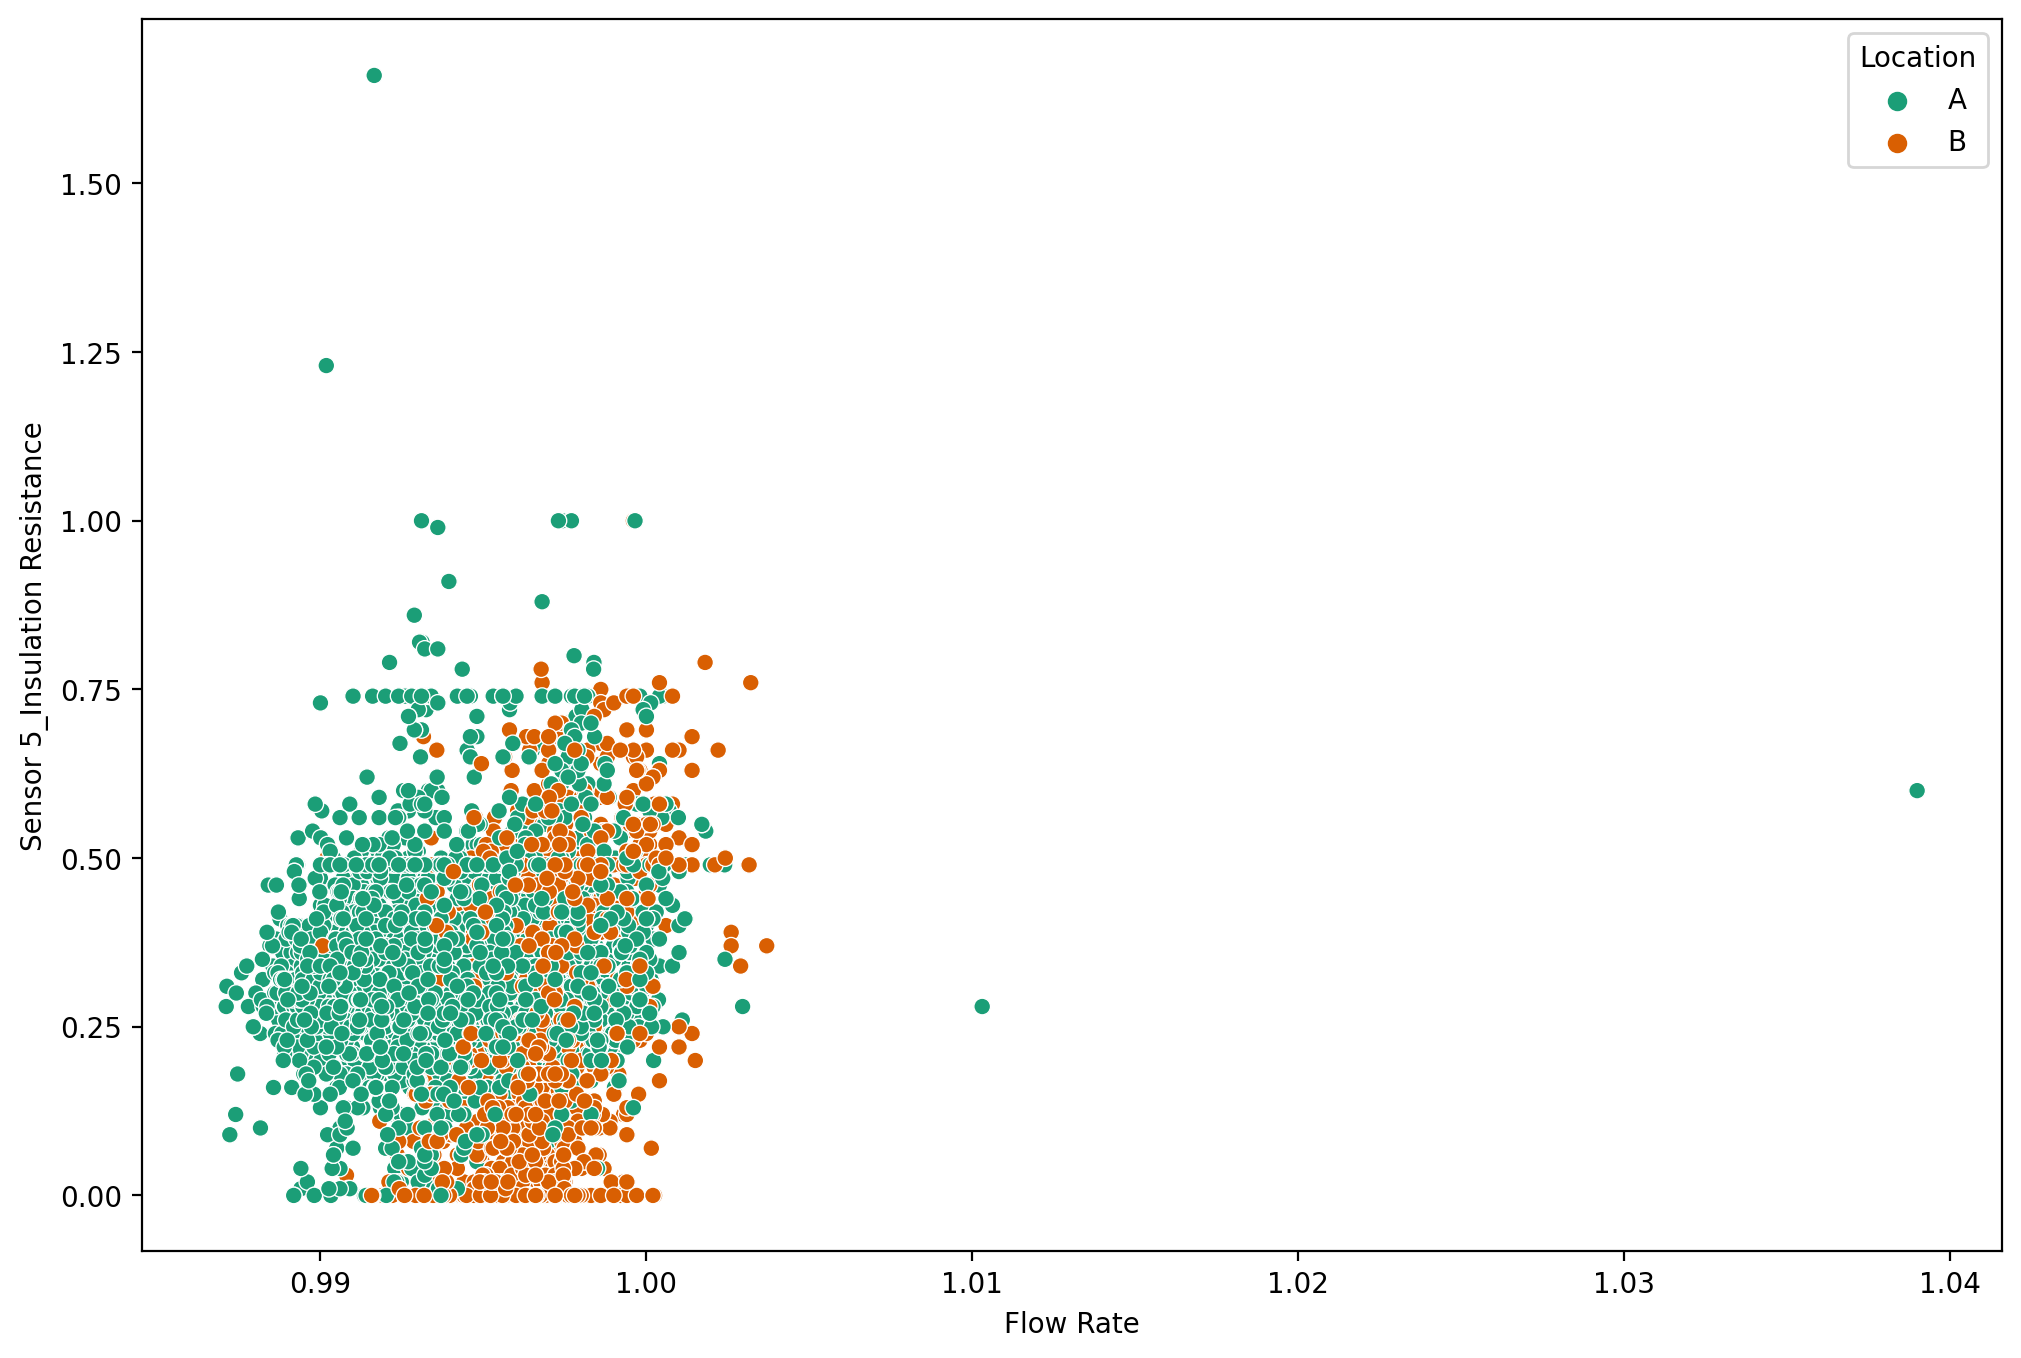

In [371]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x='Flow Rate', y='Sensor 5_Insulation Resistance', data=data, hue='Location', palette='Dark2')

<Axes: xlabel='Flow Rate', ylabel='Sensor 6 Power Quality'>

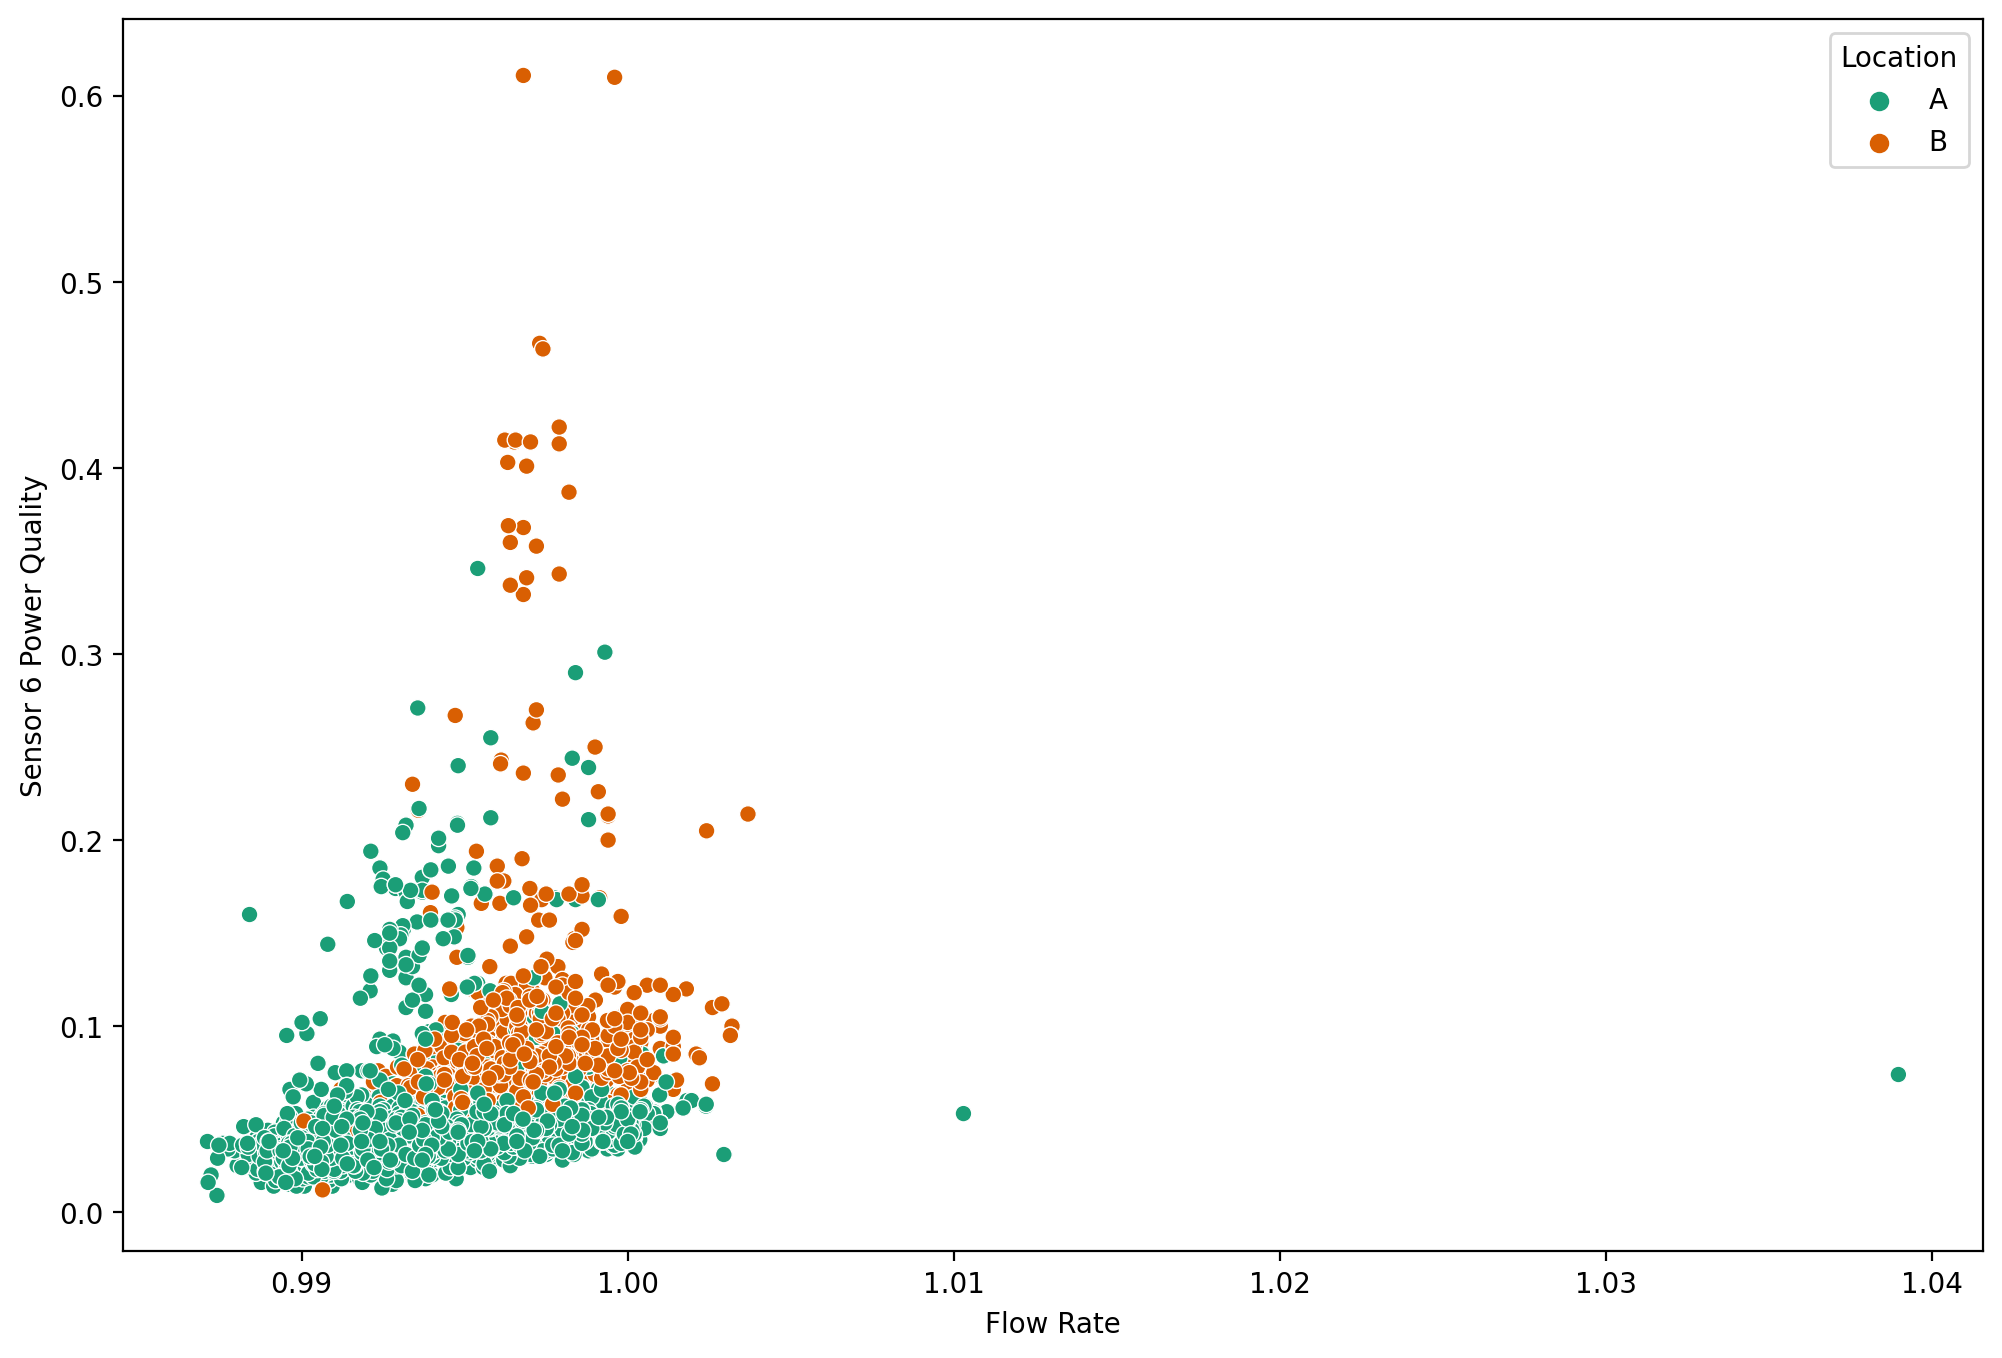

In [372]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x='Flow Rate', y='Sensor 6 Power Quality', data=data, hue='Location', palette='Dark2')

<Axes: xlabel='Flow Rate', ylabel='Days since maintenance'>

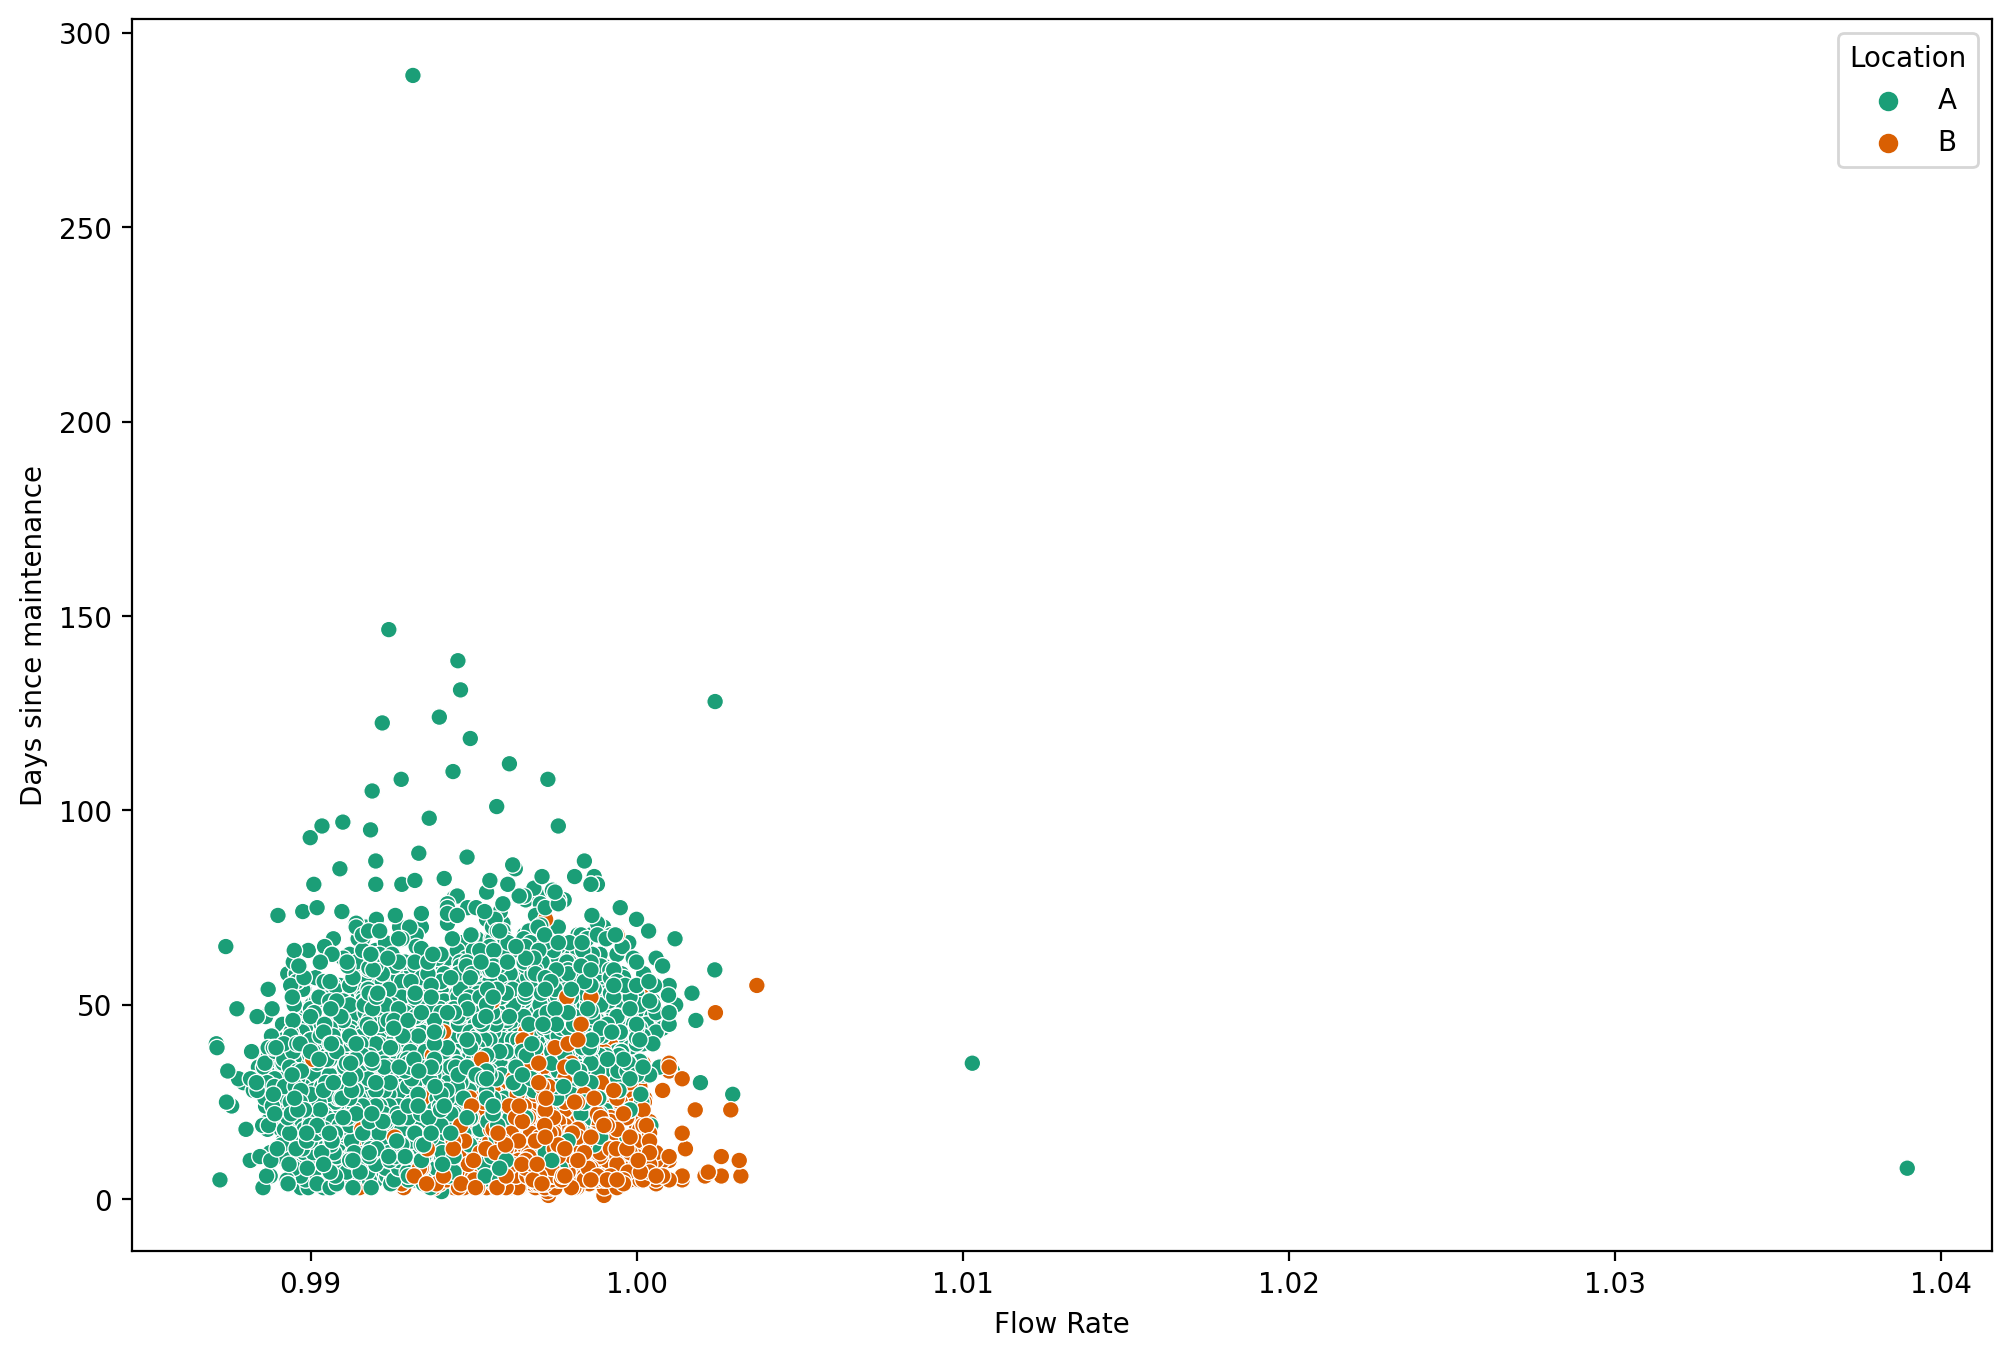

In [373]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x='Flow Rate', y='Days since maintenance', data=data, hue='Location', palette='Dark2')

<Axes: xlabel='Sensor 5_Insulation Resistance', ylabel='Sensor 4_Voltage'>

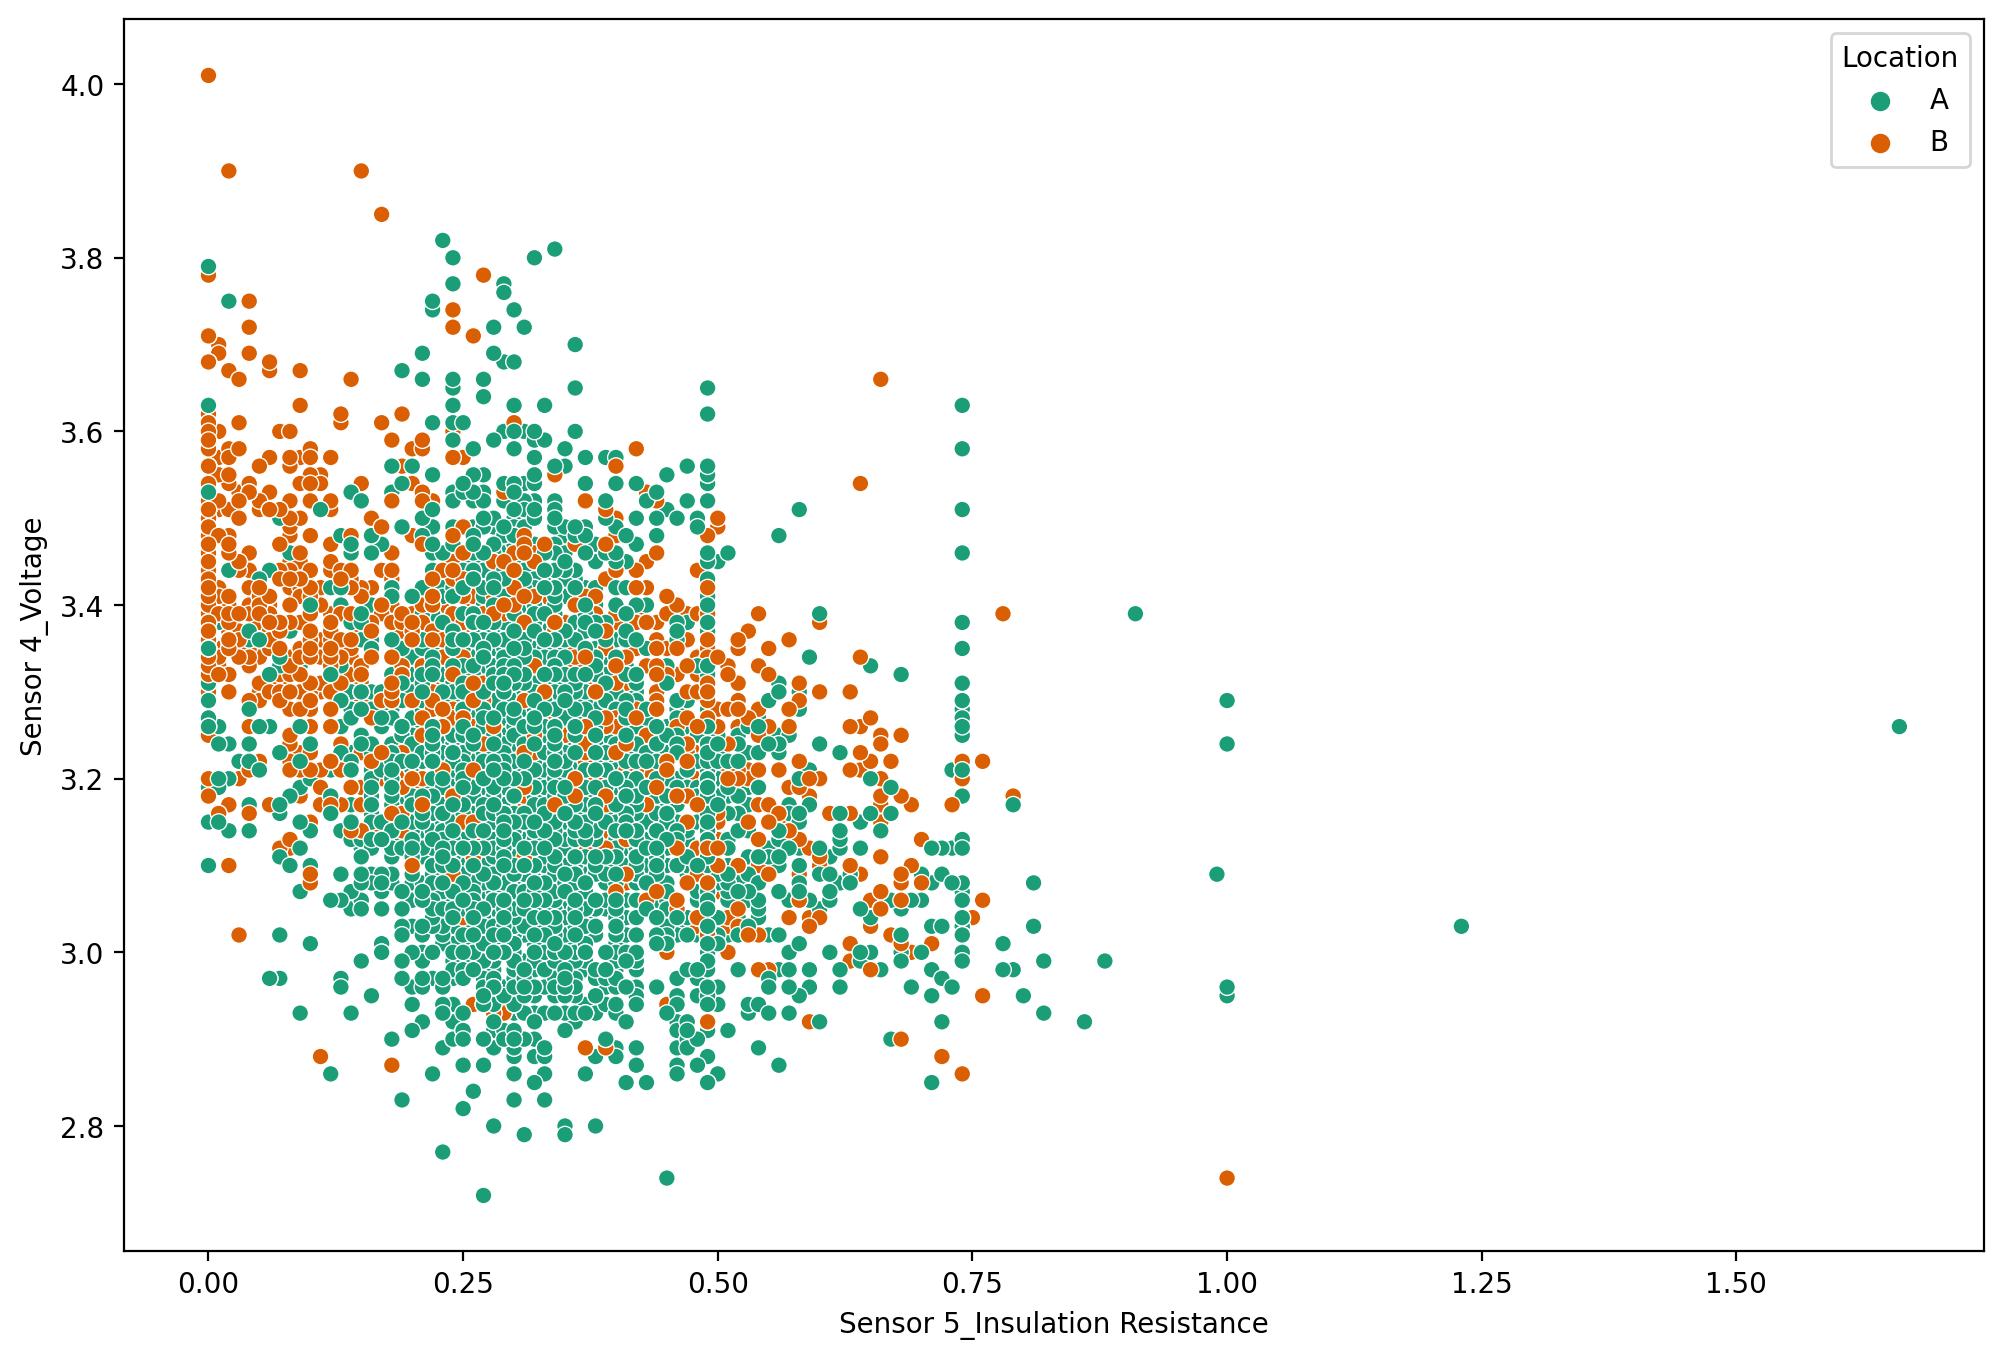

In [374]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x='Sensor 5_Insulation Resistance', y='Sensor 4_Voltage', data=data,hue='Location', palette='Dark2')

<Axes: xlabel='Sensor 5_Insulation Resistance', ylabel='Sensor 6 Power Quality'>

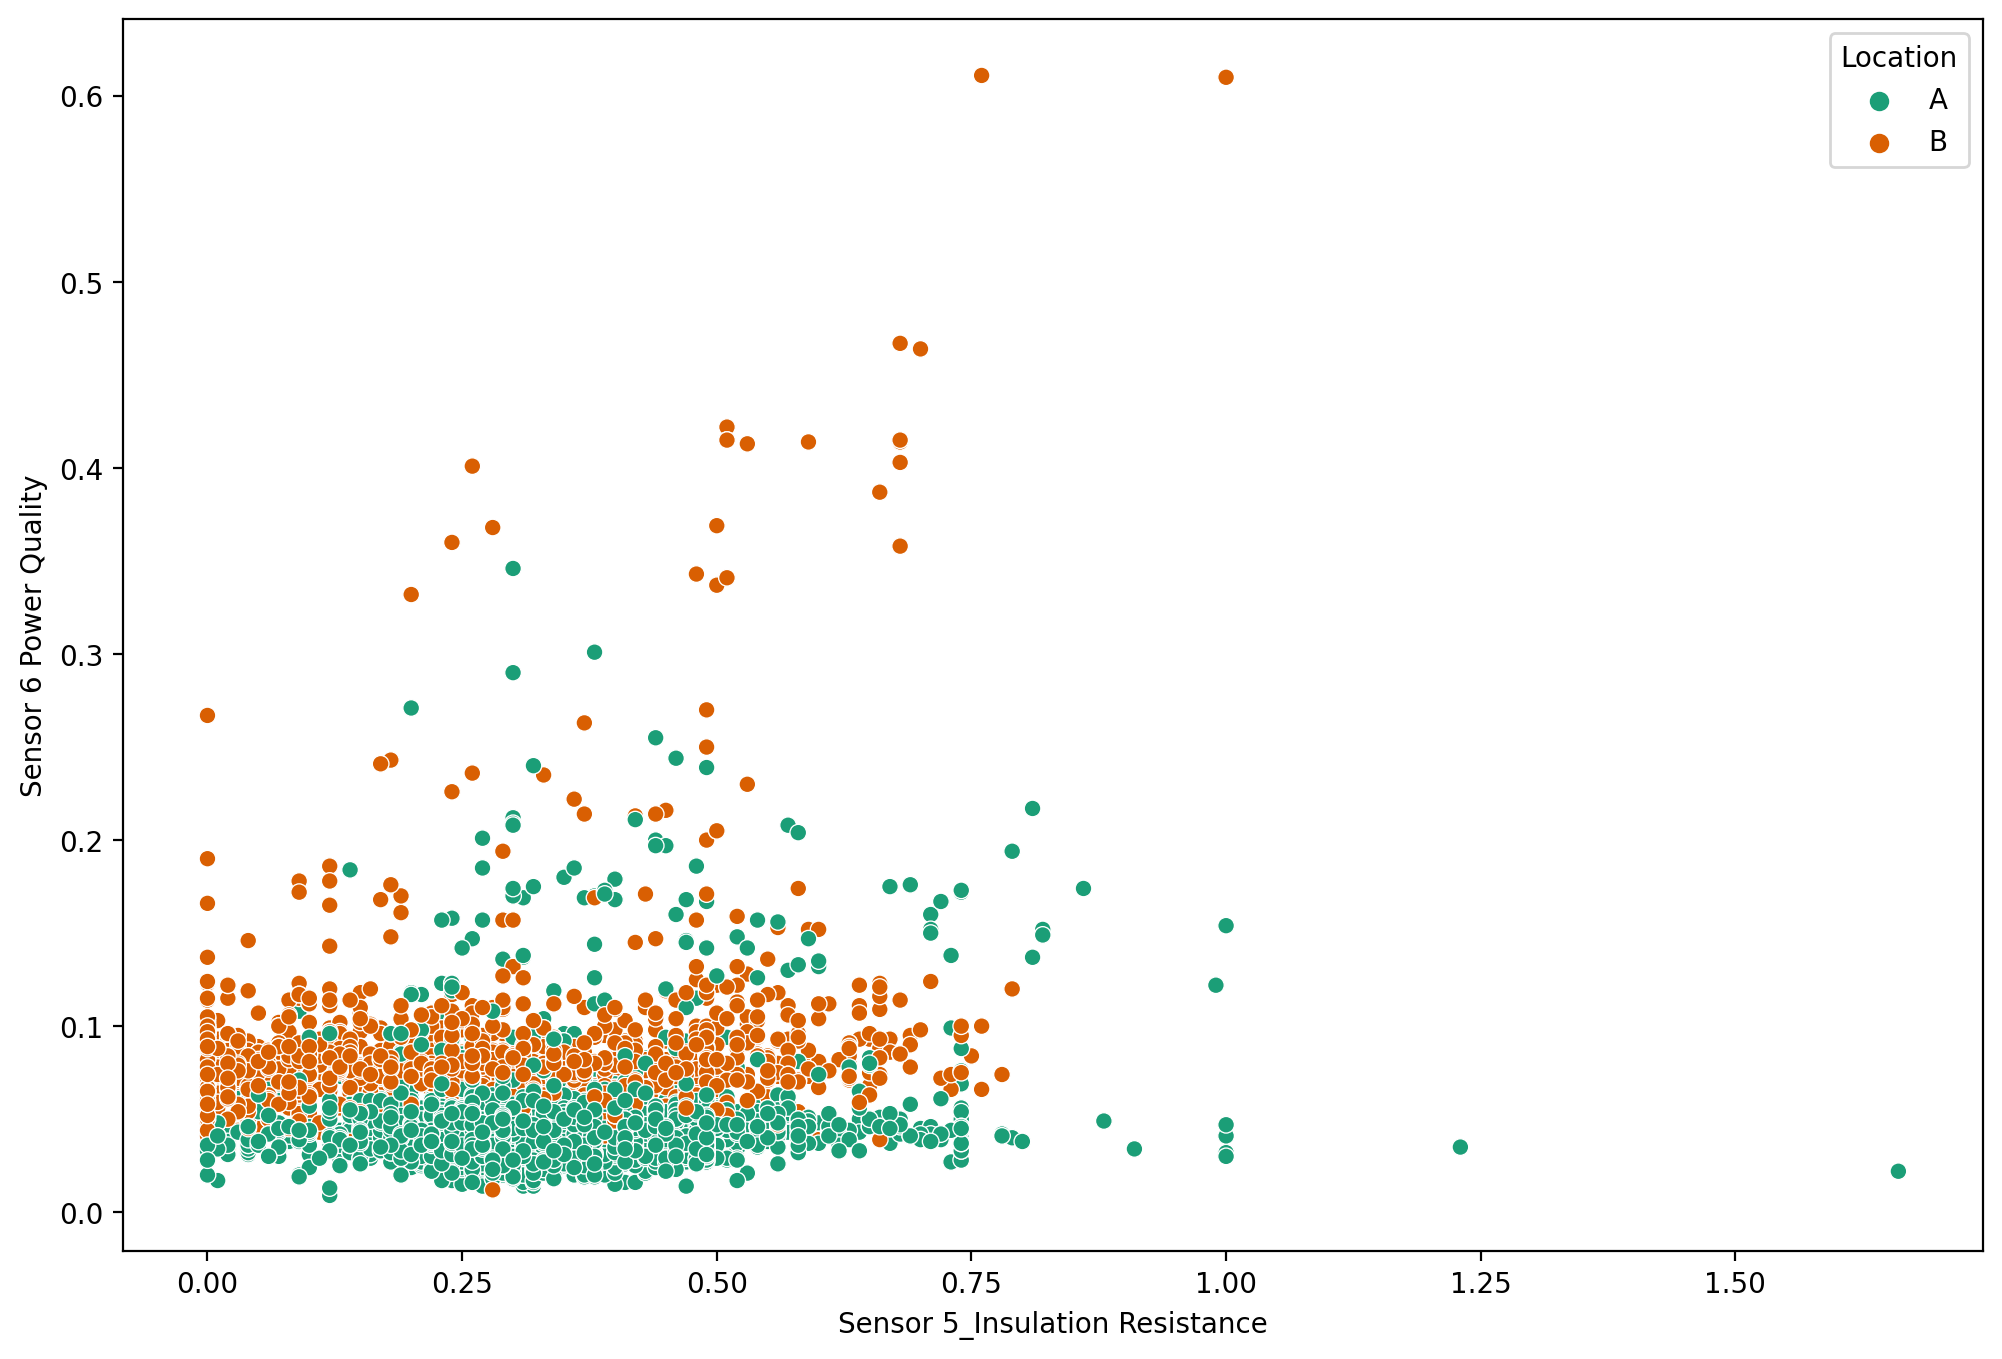

In [375]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x='Sensor 5_Insulation Resistance', y='Sensor 6 Power Quality', data=data,hue='Location', palette='Dark2')

In [376]:
X = data.drop(['Target'],axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [377]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 12)
(1300, 12)
(5197,)
(1300,)


In [378]:
data.columns

Index(['Compnent Age', 'Monthly run time', 'Location', 'Flow Rate',
       'Max Output Rate', 'Sensor 1_Temparature', 'Sensor 2_Vibration',
       'Sensor 3_Current', 'Sensor 4_Voltage',
       'Sensor 5_Insulation Resistance', 'Sensor 6 Power Quality',
       'Days since maintenance', 'Target'],
      dtype='object')

In [379]:
cat_col = ['Location']
num_cols = ['Compnent Age', 'Monthly run time','Flow Rate','Max Output Rate', 'Sensor 1_Temparature', 
             'Sensor 2_Vibration','Sensor 3_Current', 'Sensor 4_Voltage',
             'Sensor 5_Insulation Resistance', 'Sensor 6 Power Quality','Days since maintenance']

In [380]:
ohe = OneHotEncoder(drop='first',sparse=False)
X_train_new = ohe.fit_transform(X_train[cat_col])
X_test_new = ohe.transform(X_test[cat_col])

In [381]:
X_train_new.shape

(5197, 1)

In [382]:
X_test_new.shape

(1300, 1)

In [383]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train_scaled = scaler.transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

In [384]:
X_train_scaled.shape

(5197, 11)

In [385]:
x_train=np.hstack((X_train_scaled,X_train_new))

In [386]:
x_test=np.hstack((X_test_scaled,X_test_new))

In [387]:
print(x_train.shape)
print(x_test.shape)

(5197, 12)
(1300, 12)


In [388]:
scores = pd.DataFrame(columns=['Model', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1_Score', 
                               'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1_Score'])

def get_metrics(train_actual, train_predicted, test_actual, test_predicted, model_description, dataframe):

    train_accuracy  = accuracy_score(train_actual, train_predicted)
    train_recall    = recall_score(train_actual, train_predicted, average="weighted")
    train_precision = precision_score(train_actual, train_predicted, average="weighted")
    train_f1score   = f1_score(train_actual, train_predicted, average="weighted")
    
    test_accuracy   = accuracy_score(test_actual, test_predicted)
    test_recall     = recall_score(test_actual, test_predicted, average="weighted")
    test_precision  = precision_score(test_actual, test_predicted, average="weighted")
    test_f1score    = f1_score(test_actual, test_predicted, average="weighted")

    dataframe       = dataframe.append(pd.Series([model_description, 
                                                  train_accuracy, train_recall, train_precision, train_f1score,
                                                  test_accuracy, test_recall, test_precision, test_f1score],
                                                 index=scores.columns ), 
                                       ignore_index=True)

    return(dataframe)

## Logistic Regression Algorithm

In [389]:
classifier=LogisticRegression()

In [390]:
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [391]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [392]:
classifier_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [393]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [394]:
print(classifier_regressor.best_score_)

0.8175892130006662


Prediction

In [395]:
y_train_pred=classifier_regressor.predict(x_train)

In [396]:
y_pred=classifier_regressor.predict(x_test)

In [397]:
score=accuracy_score(y_pred,y_test)
print(score)

0.816923076923077


In [398]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1183
           1       0.26      0.56      0.36       117

    accuracy                           0.82      1300
   macro avg       0.61      0.70      0.63      1300
weighted avg       0.89      0.82      0.84      1300



In [399]:
scores = get_metrics(y_train, y_train_pred, y_test, y_pred, "Logistic Regression",scores)
scores

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0  Logistic Regression        0.817779      0.817779          0.79002   

   Train_F1_Score  Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0        0.789294       0.816923     0.816923        0.787858       0.788859

## Decision Tree Algorithm

In [400]:
treemodel=DecisionTreeClassifier(max_depth=3)

In [401]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[1] <= 0.38\ngini = 0.316\nsamples = 5197\nvalue = [4173, 1024]'),
 Text(0.25, 0.625, 'x[6] <= -0.832\ngini = 0.167\nsamples = 3422\nvalue = [3107, 315]'),
 Text(0.125, 0.375, 'x[1] <= -1.21\ngini = 0.373\nsamples = 604\nvalue = [454, 150]'),
 Text(0.0625, 0.125, 'gini = 0.494\nsamples = 76\nvalue = [34, 42]'),
 Text(0.1875, 0.125, 'gini = 0.325\nsamples = 528\nvalue = [420, 108]'),
 Text(0.375, 0.375, 'x[1] <= -0.436\ngini = 0.11\nsamples = 2818\nvalue = [2653, 165]'),
 Text(0.3125, 0.125, 'gini = 0.055\nsamples = 1777\nvalue = [1727, 50]'),
 Text(0.4375, 0.125, 'gini = 0.197\nsamples = 1041\nvalue = [926, 115]'),
 Text(0.75, 0.625, 'x[1] <= 1.043\ngini = 0.48\nsamples = 1775\nvalue = [1066, 709]'),
 Text(0.625, 0.375, 'x[8] <= -0.369\ngini = 0.416\nsamples = 850\nvalue = [599, 251]'),
 Text(0.5625, 0.125, 'gini = 0.234\nsamples = 207\nvalue = [179, 28]'),
 Text(0.6875, 0.125, 'gini = 0.453\nsamples = 643\nvalue = [420, 223]'),
 Text(0.875, 0.375, 'x[5] <= -0.787\n

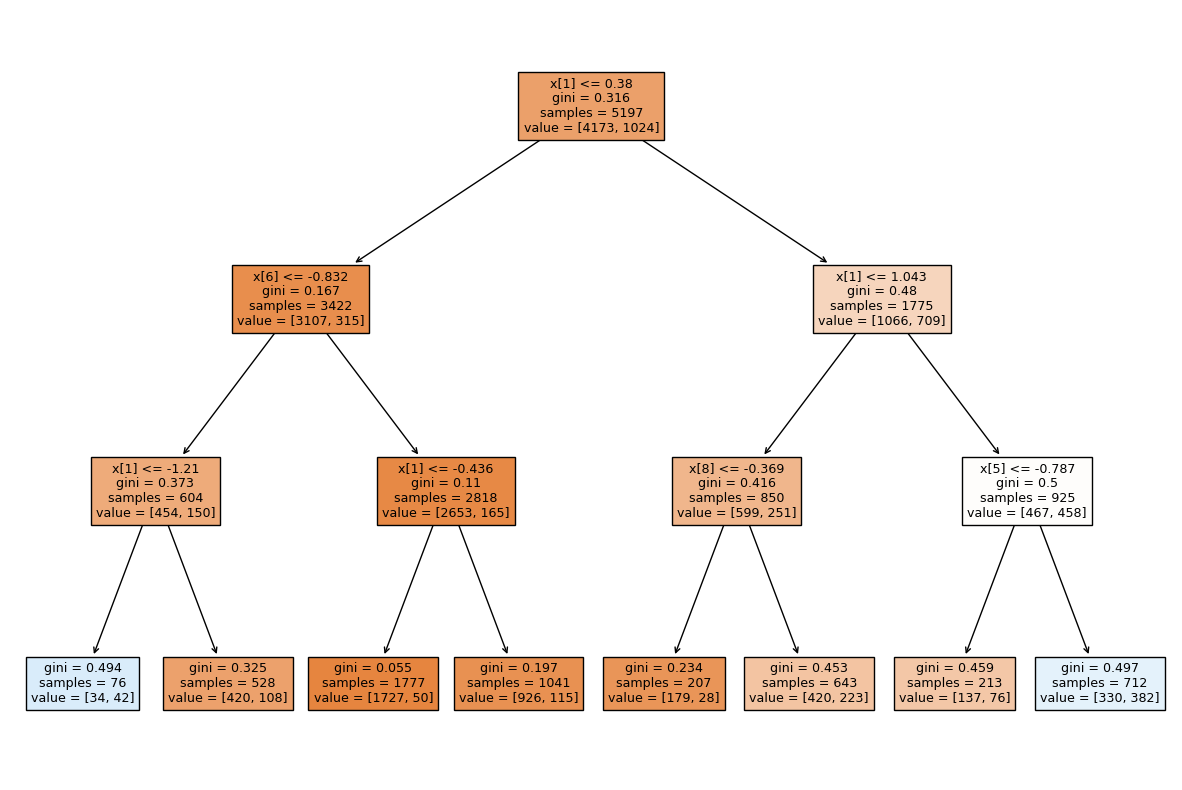

In [402]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [403]:
y_train_pred=treemodel.predict(x_train)

In [404]:
y_pred=treemodel.predict(x_test)

In [405]:
score=accuracy_score(y_pred,y_test)
print(score)

0.8084615384615385


In [406]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1116
           1       0.37      0.51      0.43       184

    accuracy                           0.81      1300
   macro avg       0.64      0.68      0.66      1300
weighted avg       0.84      0.81      0.82      1300



In [407]:
scores = get_metrics(y_train, y_train_pred, y_test, y_pred, "Decision tree",scores)
scores

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0  Logistic Regression        0.817779      0.817779         0.790020   
1        Decision tree        0.814508      0.814508         0.799712   

   Train_F1_Score  Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0        0.789294       0.816923     0.816923        0.787858       0.788859  
1        0.804979       0.808462     0.808462        0.790062       0.796395

Decision Tree With pruning

In [408]:

parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [409]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [410]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [411]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

## Prediction

In [412]:
y_train_pred=cv.predict(x_train)

In [413]:
y_pred=cv.predict(x_test)

In [414]:
score=accuracy_score(y_pred,y_test)

In [415]:
score

0.8176923076923077

In [416]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1184
           1       0.26      0.57      0.36       116

    accuracy                           0.82      1300
   macro avg       0.61      0.71      0.63      1300
weighted avg       0.89      0.82      0.85      1300



In [417]:
scores = get_metrics(y_train, y_train_pred, y_test, y_pred, "Decision tree pruning",scores)
scores

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0    Logistic Regression        0.817779      0.817779         0.790020   
1          Decision tree        0.814508      0.814508         0.799712   
2  Decision tree pruning        0.837406      0.837406         0.819688   

   Train_F1_Score  Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0        0.789294       0.816923     0.816923        0.787858       0.788859  
1        0.804979       0.808462     0.808462        0.790062       0.796395  
2        0.814570       0.817692     0.817692        0.788912       0.789447

### Random forest algorithm

In [418]:
rf = RandomForestClassifier()

In [419]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [420]:
y_train_pred=rf.predict(x_train)

In [421]:
accuracy_score(y_test,y_pred)

0.8846153846153846

In [422]:
scores = get_metrics(y_train, y_train_pred, y_test, y_pred, "random forest",scores)
scores

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0    Logistic Regression        0.817779      0.817779         0.790020   
1          Decision tree        0.814508      0.814508         0.799712   
2  Decision tree pruning        0.837406      0.837406         0.819688   
3          random forest        1.000000      1.000000         1.000000   

   Train_F1_Score  Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0        0.789294       0.816923     0.816923        0.787858       0.788859  
1        0.804979       0.808462     0.808462        0.790062       0.796395  
2        0.814570       0.817692     0.817692        0.788912       0.789447  
3        1.000000       0.884615     0.884615        0.878445       0.875904

In [423]:
n_estimators = [20,60,100,120]
max_features = [0.2,0.6,1.0]
max_depth = [2,8,None]
max_samples = [0.5,0.75,1.0]

In [424]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }

In [425]:
rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [426]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [427]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.75,
 'n_estimators': 120}

In [428]:
rf_grid.best_score_

0.8818545939142666

In [429]:
y_train_pred=rf_grid.predict(x_train)

In [430]:
y_pred=rf_grid.predict(x_test)

In [431]:
score=accuracy_score(y_pred,y_test)

In [432]:
score

0.8884615384615384

In [433]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1126
           1       0.56      0.81      0.66       174

    accuracy                           0.89      1300
   macro avg       0.76      0.86      0.80      1300
weighted avg       0.91      0.89      0.90      1300



In [434]:
scores = get_metrics(y_train, y_train_pred, y_test, y_pred, "random forest best param",scores)
scores

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0       Logistic Regression        0.817779      0.817779         0.790020   
1             Decision tree        0.814508      0.814508         0.799712   
2     Decision tree pruning        0.837406      0.837406         0.819688   
3             random forest        1.000000      1.000000         1.000000   
4  random forest best param        0.998076      0.998076         0.998080   

   Train_F1_Score  Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0        0.789294       0.816923     0.816923        0.787858       0.788859  
1        0.804979       0.808462     0.808462        0.790062       0.796395  
2        0.814570       0.817692     0.817692        0.788912       0.789447  
3        1.000000       0.884615     0.884615        0.878445       0.875904  
4        0.998072       0.888462     0.888462        0.882981       0.880171

### KNN Algorithm

We are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [435]:
knn = KNeighborsClassifier(n_neighbors=1)

In [436]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [437]:
y_train_pred=knn.predict(x_train)

In [438]:
y_pred=knn.predict(x_test)

In [439]:
print(accuracy_score(y_pred,y_test))

0.86


In [440]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1047
           1       0.63      0.67      0.65       253

    accuracy                           0.86      1300
   macro avg       0.78      0.79      0.78      1300
weighted avg       0.86      0.86      0.86      1300



In [441]:
scores = get_metrics(y_train, y_train_pred, y_test, y_pred, "KNN K=1",scores)
scores

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0       Logistic Regression        0.817779      0.817779         0.790020   
1             Decision tree        0.814508      0.814508         0.799712   
2     Decision tree pruning        0.837406      0.837406         0.819688   
3             random forest        1.000000      1.000000         1.000000   
4  random forest best param        0.998076      0.998076         0.998080   
5                   KNN K=1        1.000000      1.000000         1.000000   

   Train_F1_Score  Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0        0.789294       0.816923     0.816923        0.787858       0.788859  
1        0.804979       0.808462     0.808462        0.790062       0.796395  
2        0.814570       0.817692     0.817692        0.788912       0.789447  
3        1.000000       0.884615     0.884615        0.878445       0.875904  
4        0.998072       0.888462     0.888462        0.882981       0.880171  
5        1.000000       0.860000     0.860000        0.863077       0.861413

### Choosing k-value

In [442]:
from sklearn.model_selection import cross_val_score

In [443]:
accuracy_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Error Rate')

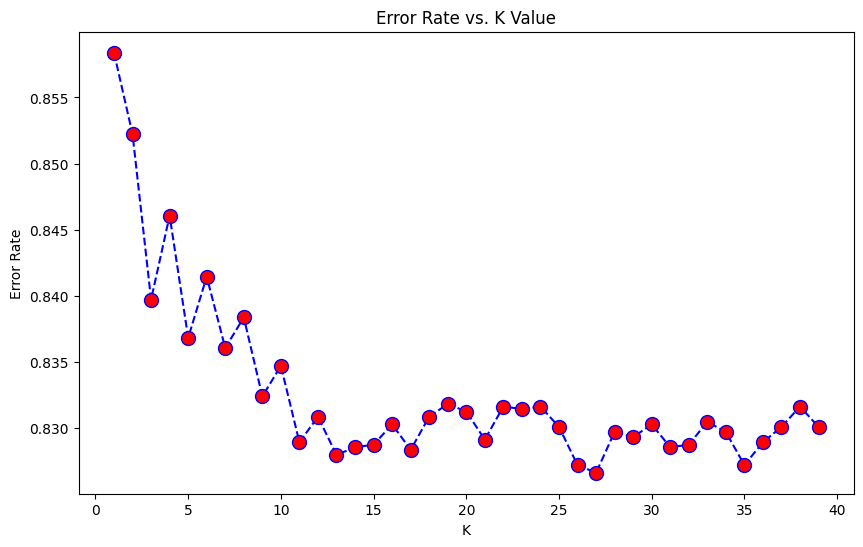

In [444]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>21 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report

In [445]:
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=1


[[949  98]
 [ 84 169]]


              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1047
           1       0.63      0.67      0.65       253

    accuracy                           0.86      1300
   macro avg       0.78      0.79      0.78      1300
weighted avg       0.86      0.86      0.86      1300



In [446]:
k23 = KNeighborsClassifier(n_neighbors=23)

k23.fit(x_train,y_train)

y_pred = k23.predict(x_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=23


[[998  49]
 [145 108]]


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1047
           1       0.69      0.43      0.53       253

    accuracy                           0.85      1300
   macro avg       0.78      0.69      0.72      1300
weighted avg       0.84      0.85      0.84      1300



In [447]:
print(accuracy_score(y_pred,y_test))

0.8507692307692307


In [448]:
y_train_pred=k23.predict(x_train)

In [449]:
scores = get_metrics(y_train, y_train_pred, y_test, y_pred, "KNN K=23",scores)
scores

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0       Logistic Regression        0.817779      0.817779         0.790020   
1             Decision tree        0.814508      0.814508         0.799712   
2     Decision tree pruning        0.837406      0.837406         0.819688   
3             random forest        1.000000      1.000000         1.000000   
4  random forest best param        0.998076      0.998076         0.998080   
5                   KNN K=1        1.000000      1.000000         1.000000   
6                  KNN K=23        0.844333      0.844333         0.829630   

   Train_F1_Score  Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0        0.789294       0.816923     0.816923        0.787858       0.788859  
1        0.804979       0.808462     0.808462        0.790062       0.796395  
2        0.814570       0.817692     0.817692        0.788912       0.789447  
3        1.000000       0.884615     0.884615        0.878445       0.875904  
4        0.998072       0.888462     0.888462        0.882981       0.880171  
5        1.000000       0.860000     0.860000        0.863077       0.861413  
6        0.830331       0.850769     0.850769        0.837090       0.836569

### We can see comparing above all algorithms KNN with K=23 gives the high accuracy value.

The four cells in the confusion matrix represent:

True Positive (TP): The number of data points that are correctly classified as positive.

False Positive (FP): The number of data points that are incorrectly classified as positive.

False Negative (FN): The number of data points that are incorrectly classified as negative.

True Negative (TN): The number of data points that are correctly classified as negative.